# Data Info
## ewap_dataset
- This sequence was acquired from the top of the ETH main building, Zurich in 2009.
- ETH Walking Pedestrians (EWAP).  
- The annotation was done at at 2.5 fps, i.e. with timestep 0.4 seconds.
- The actual annotation is stored in the obsmat.txt file.
- Each line is stored in the format [frame_number, Pedestrian_ID, pos_x, pos_z, pos_y, v_x, v_z, v_y].
- Pos_z and v_z are not used.
- Positions and velocities are in metres.
- They tried to keep note of the people that seemsd to walk in gropus, listed in the file groups.txt.



In [72]:
# Data processing for the ewap_dataset-> seq_eth
import numpy as np
import os
import matplotlib.pyplot as plt

#local directory of the data_file
dir="ewap_dataset/seq_eth/obsmat.txt"
#importing data in a numpy array with each column for one feature and
# the number of rows=the number of datasets
data=np.genfromtxt(dir)
frames_id,frames_pedX,frames_pedY={},{},{} #initializing 3 dictionaries to store ped_id, x and y for each frame
# The keys of all the 3 dictionaries would be the frame number 
for i in range(len(data)):
    frame=data[i,0]
    if(frame in frames_id.keys()):
        frames_id[frame].append(data[i,1]) #appending pedestrian_id's
        frames_pedX[frame].append(data[i,2]) #appending ped_x
        frames_pedY[frame].append(data[i,4]) #appending ped_y
    else:
        frames_id[frame]=[] #defining an empy list for the frame key in the dictionary 
        frames_pedX[frame]=[]
        frames_pedY[frame]=[]
        frames_id[frame].append(data[i,1]) #appending pedestrian_id's
        frames_pedX[frame].append(data[i,2]) #appending ped_x
        frames_pedY[frame].append(data[i,4]) #appending ped_y        
    
#calculating min ped_x, max ped_x, in ped_y and max ped_y
min_pedX, max_pedX= min(data[:,2]), max(data[:,2])
min_pedY, max_pedY= min(data[:,4]), max(data[:,4])

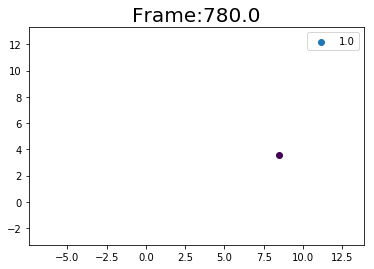

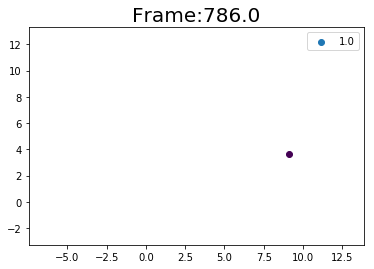

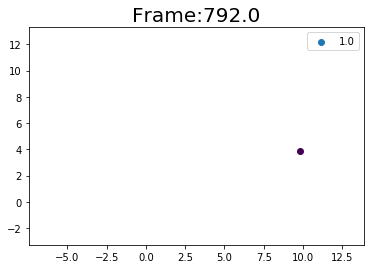

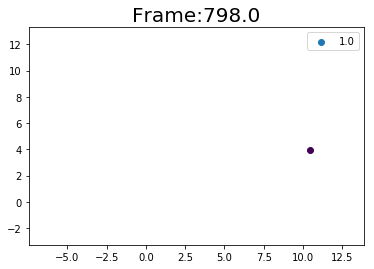

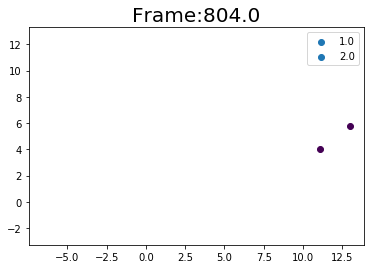

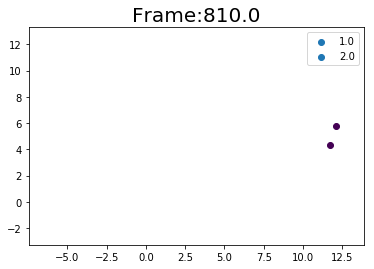

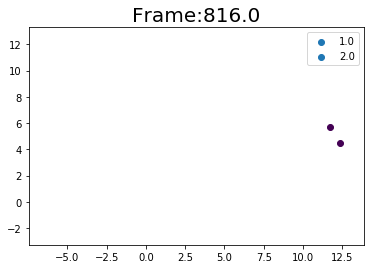

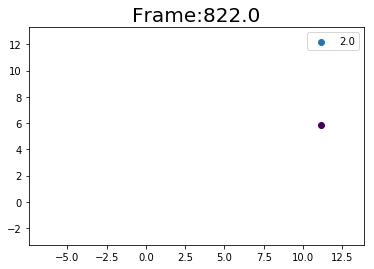

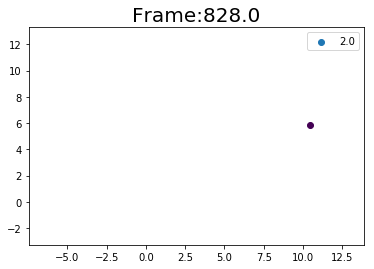

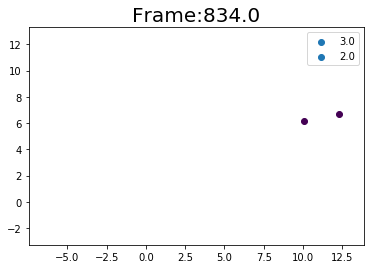

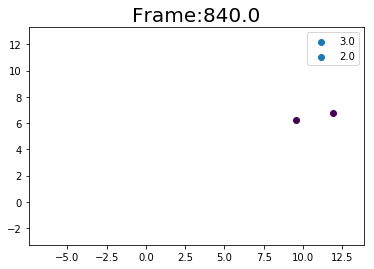

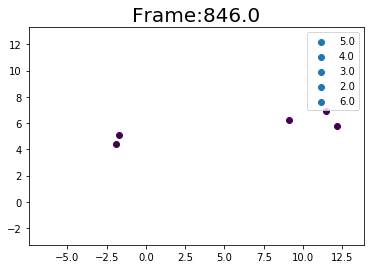

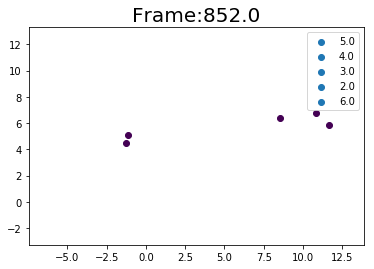

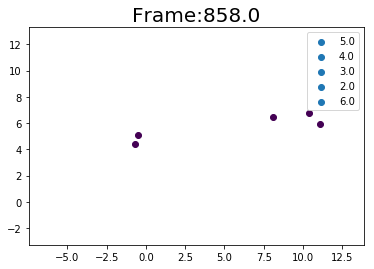

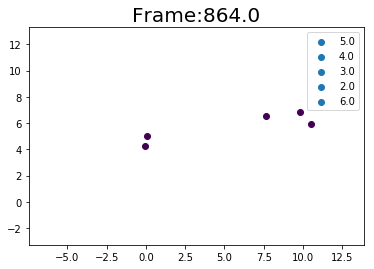

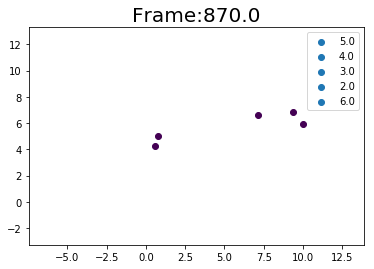

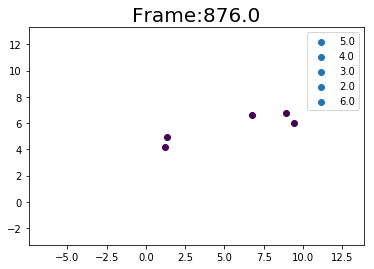

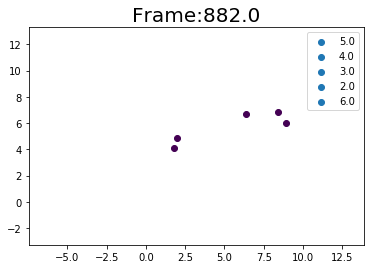

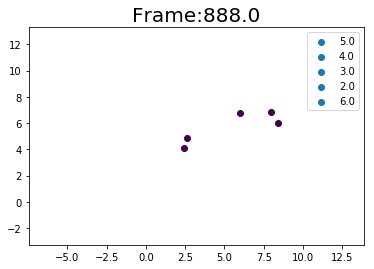

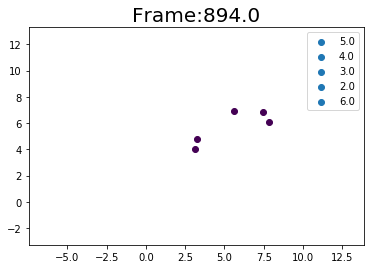

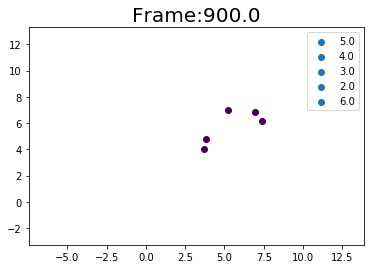

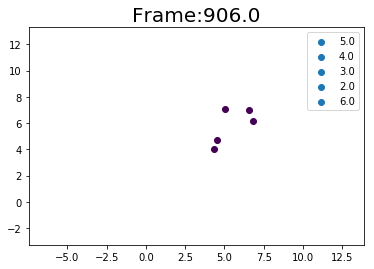

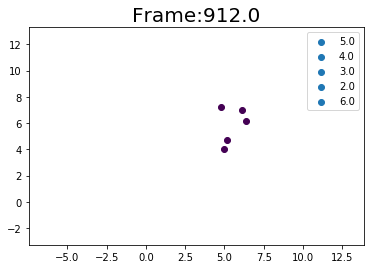

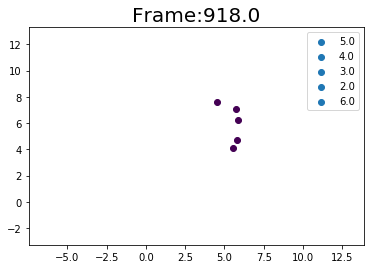

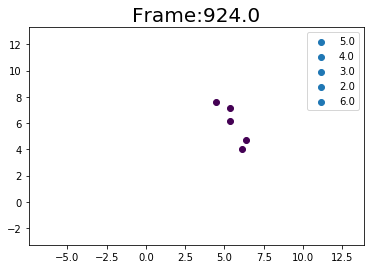

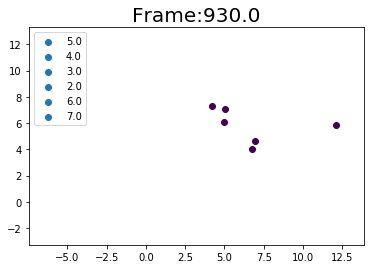

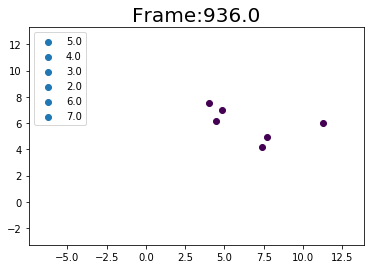

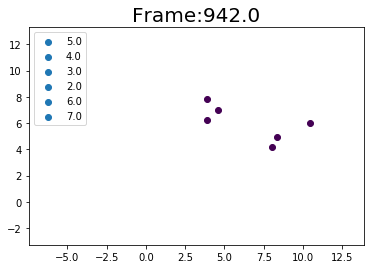

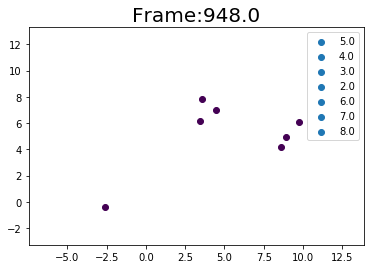

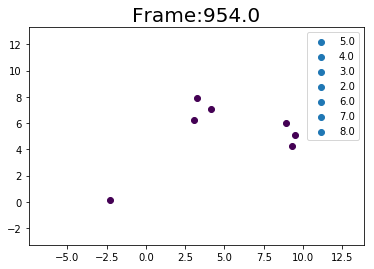

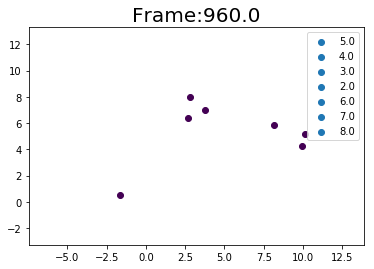

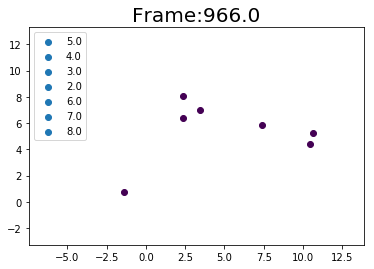

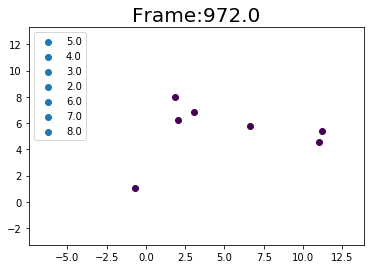

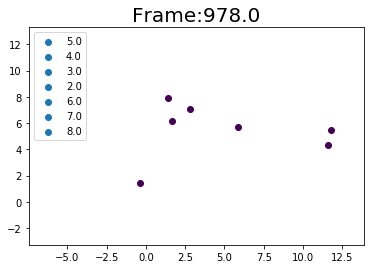

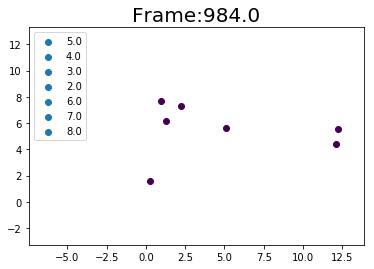

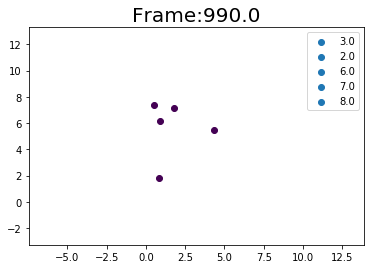

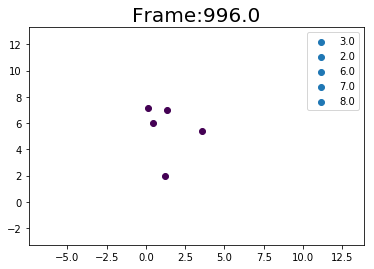

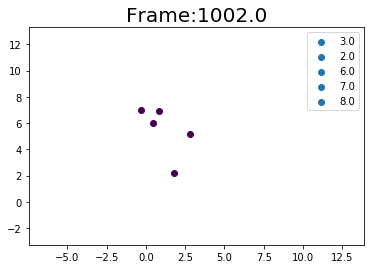

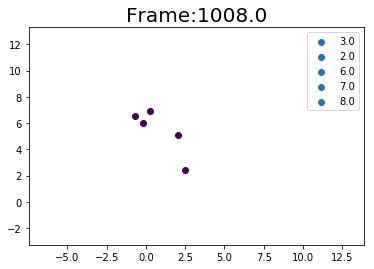

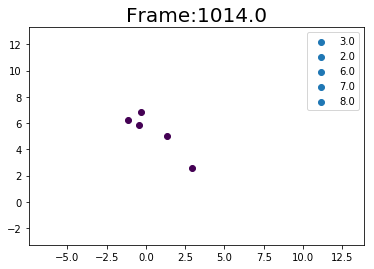

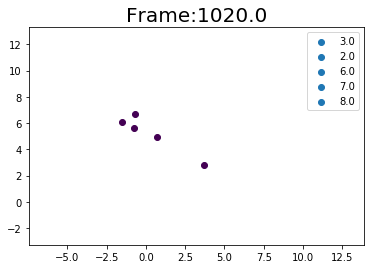

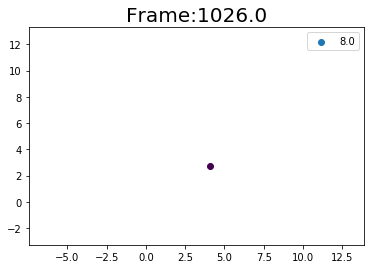

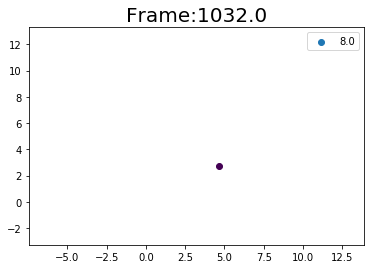

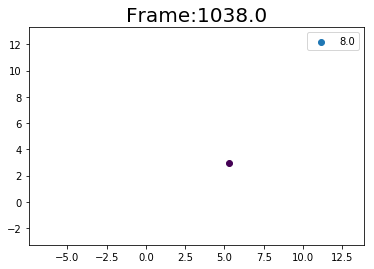

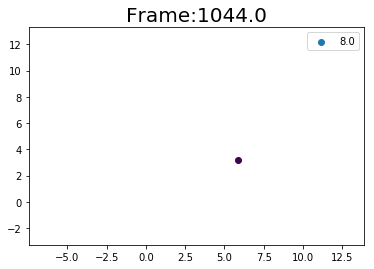

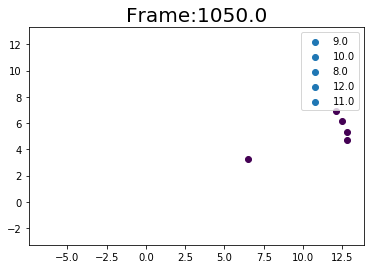

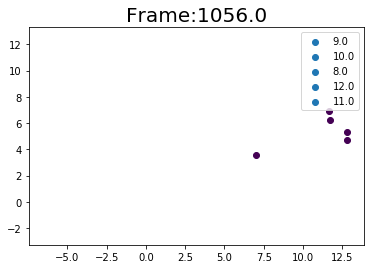

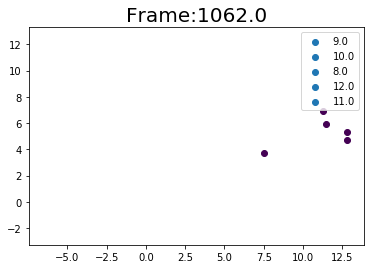

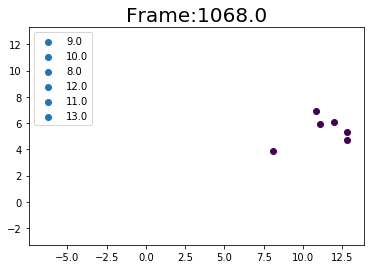

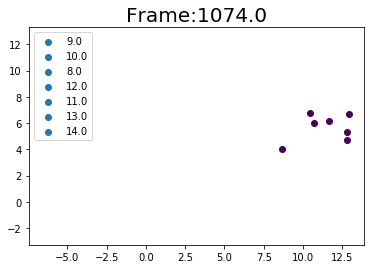

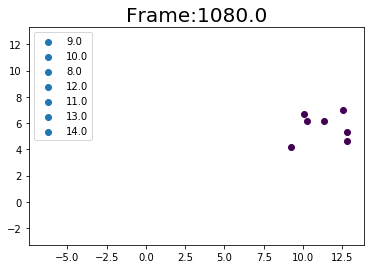

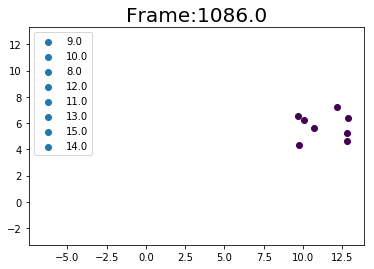

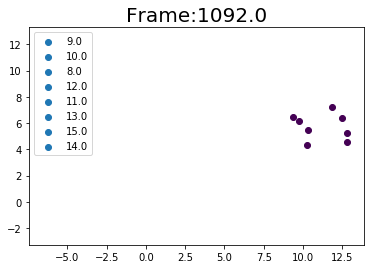

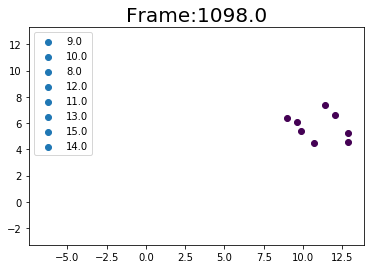

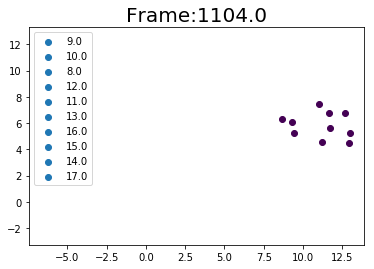

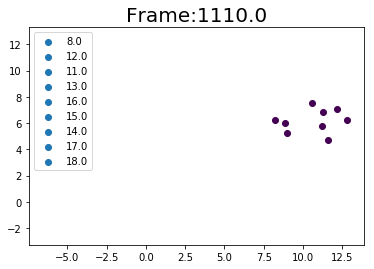

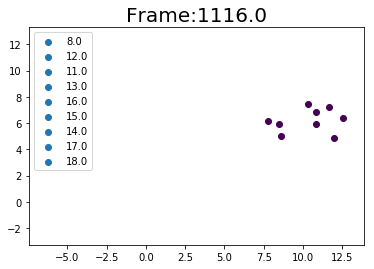

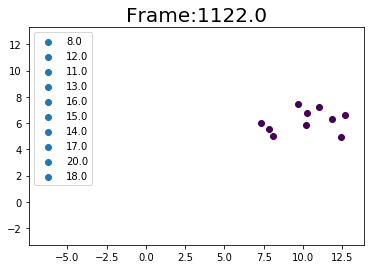

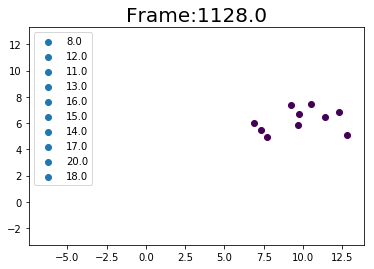

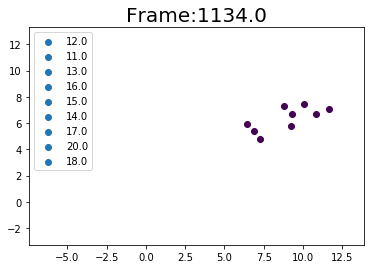

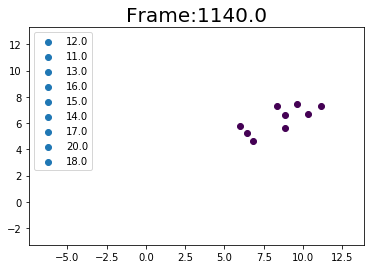

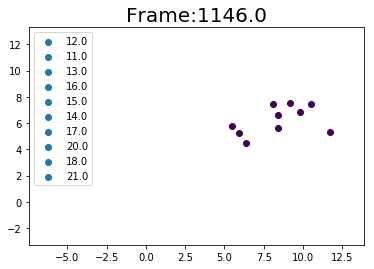

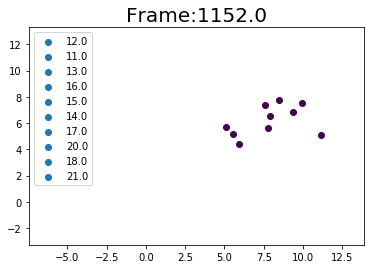

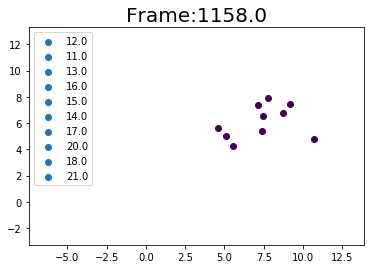

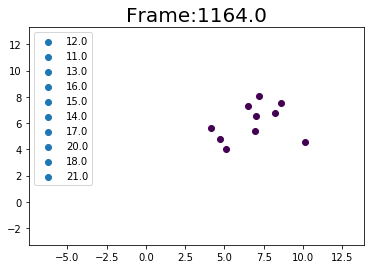

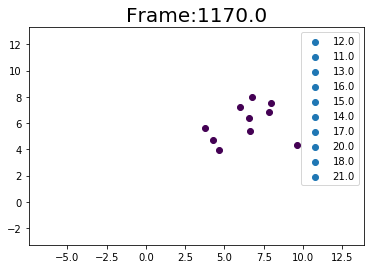

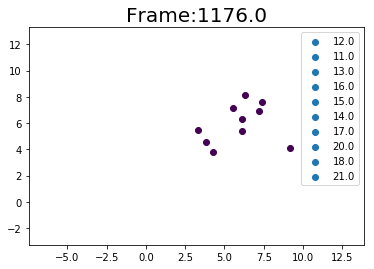

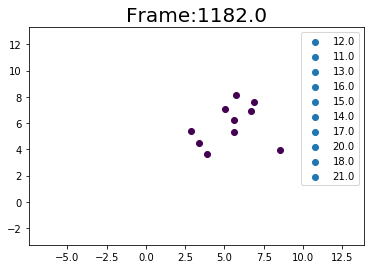

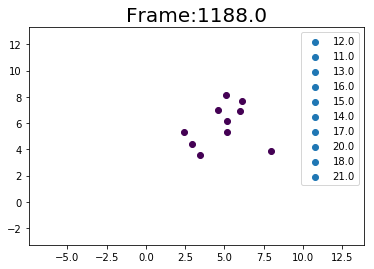

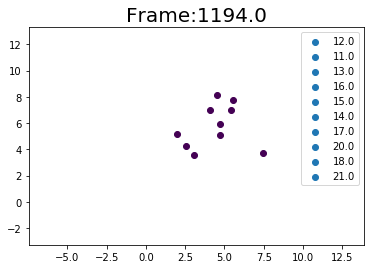

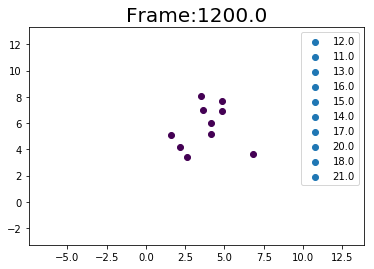

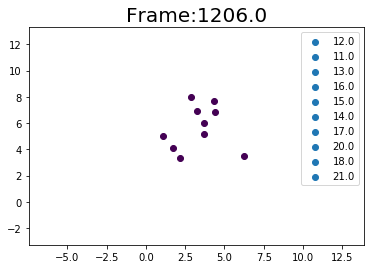

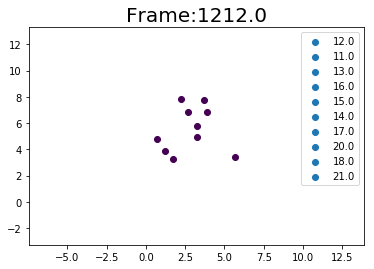

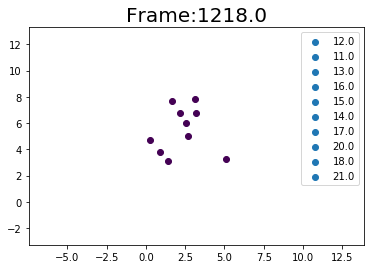

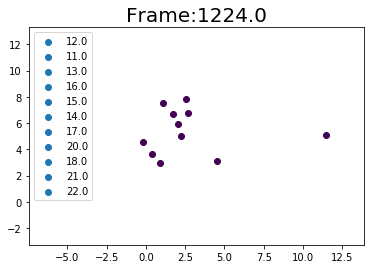

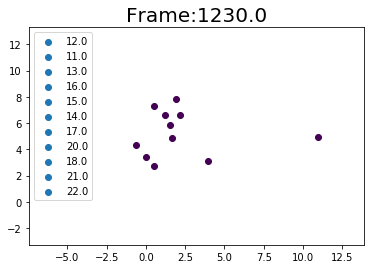

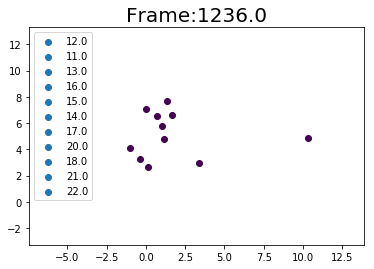

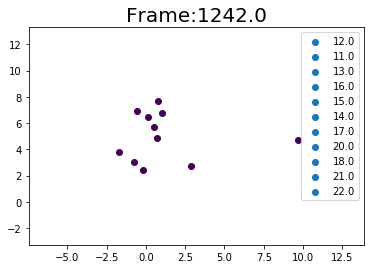

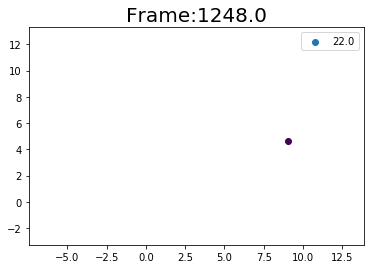

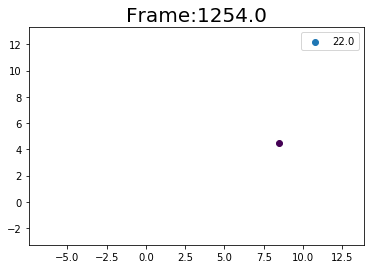

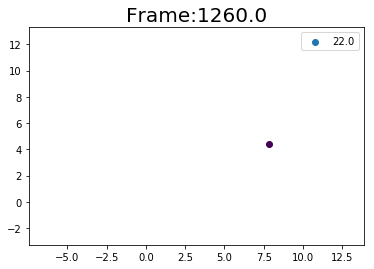

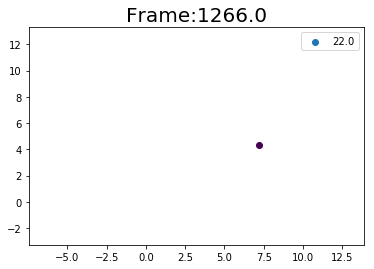

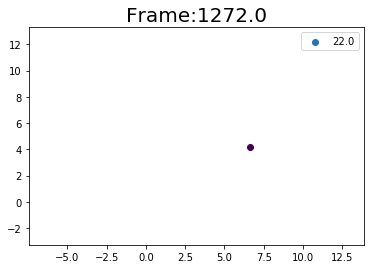

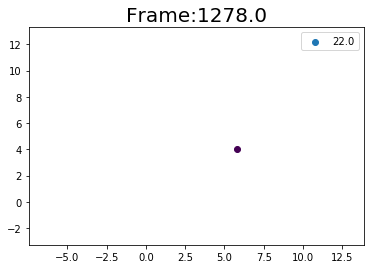

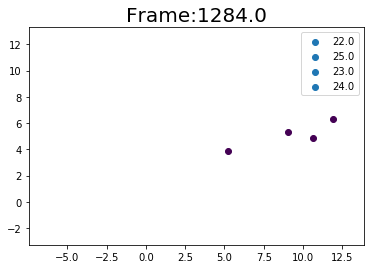

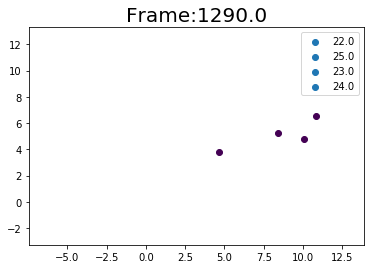

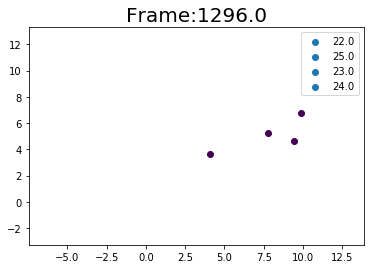

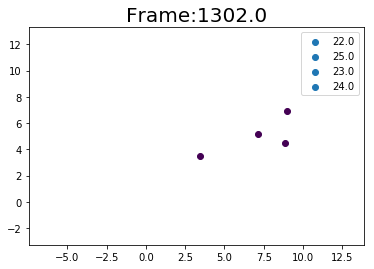

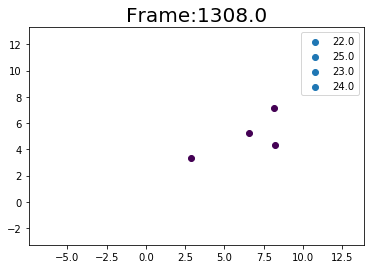

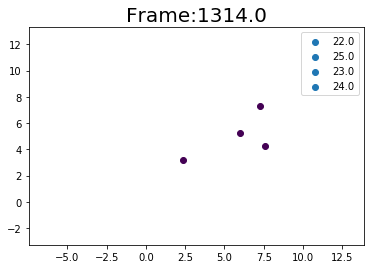

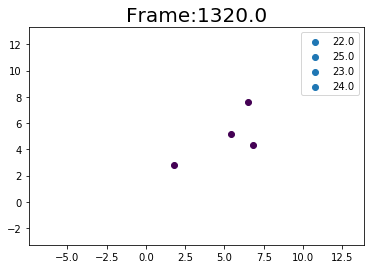

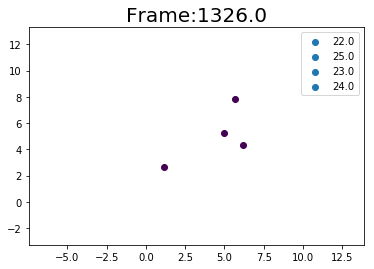

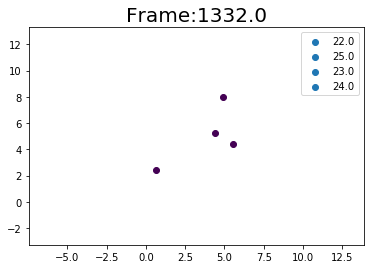

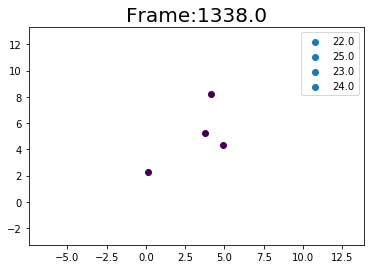

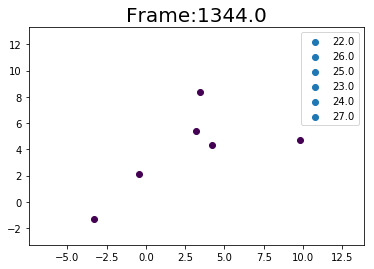

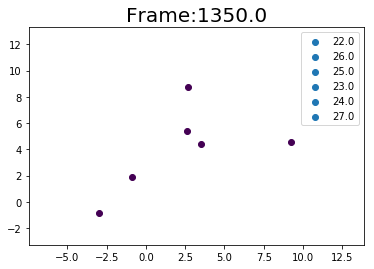

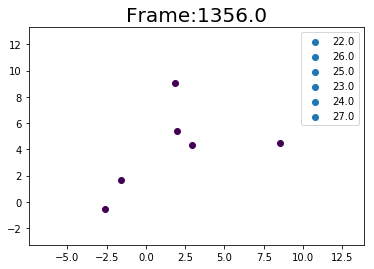

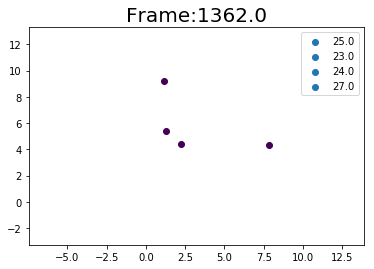

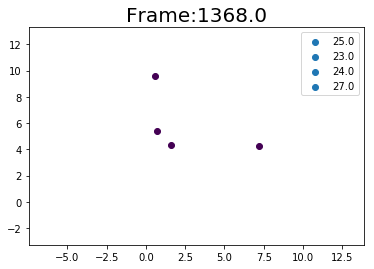

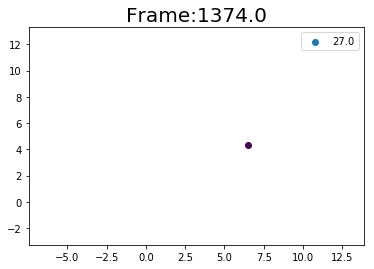

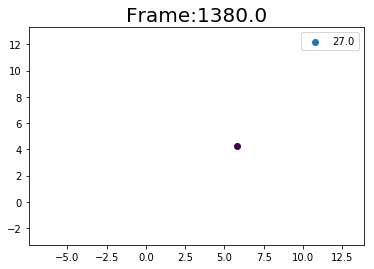

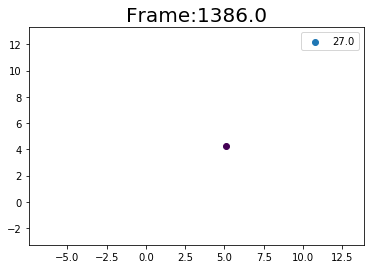

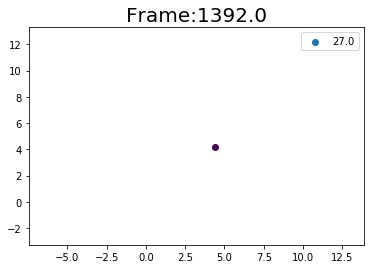

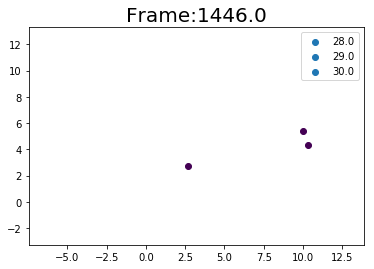

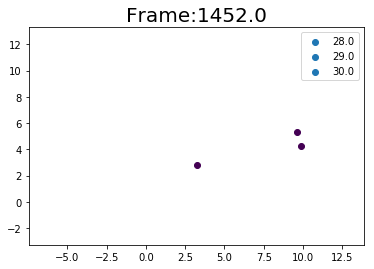

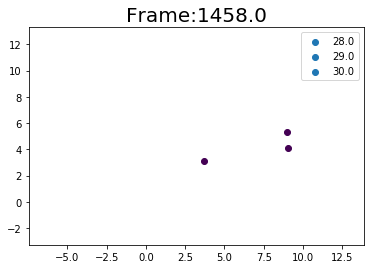

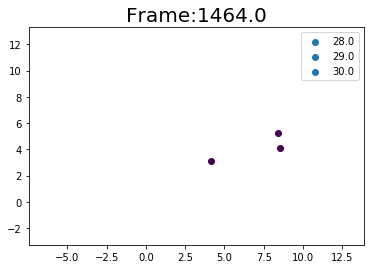

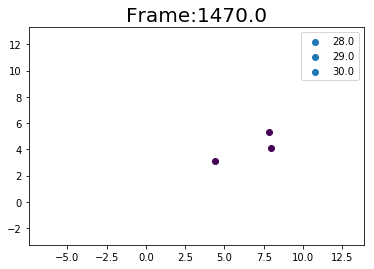

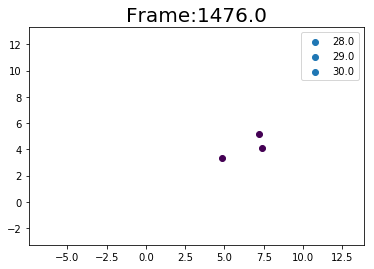

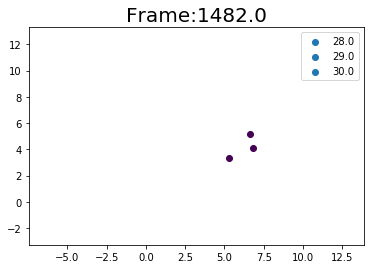

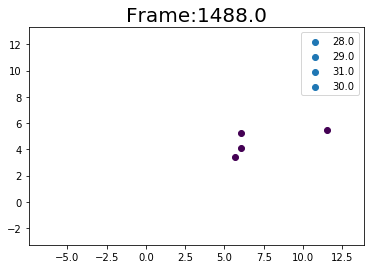

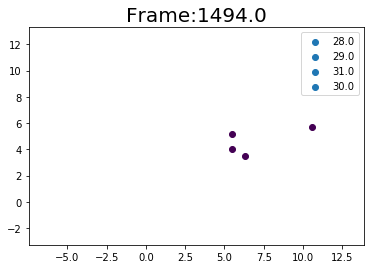

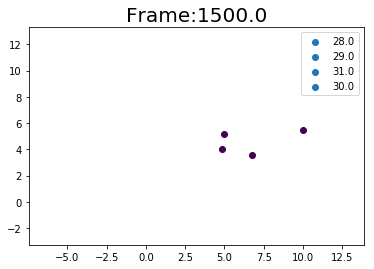

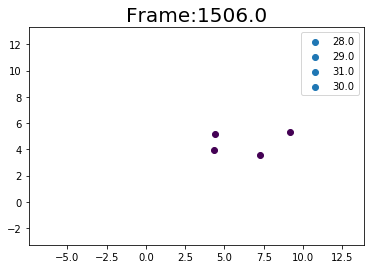

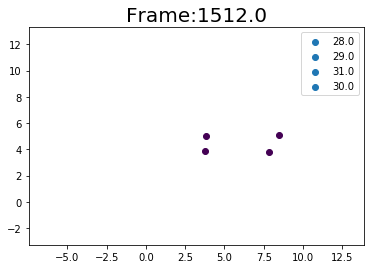

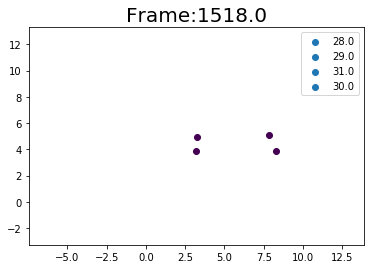

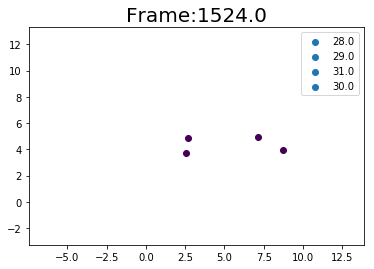

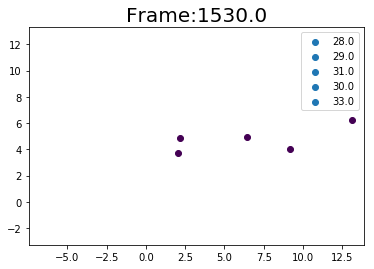

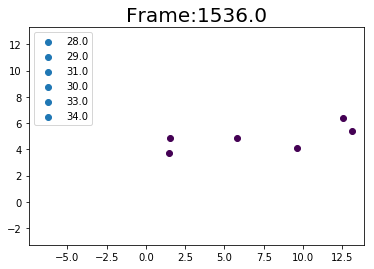

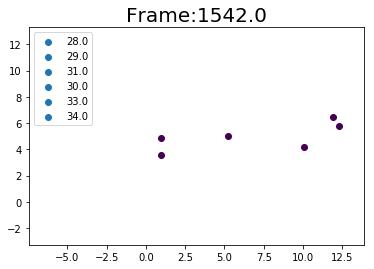

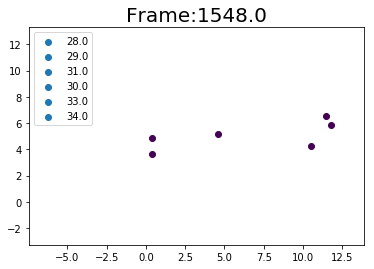

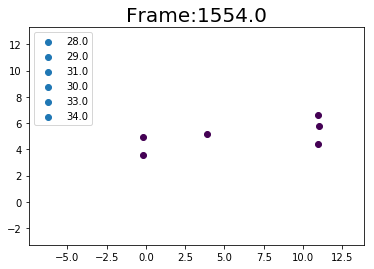

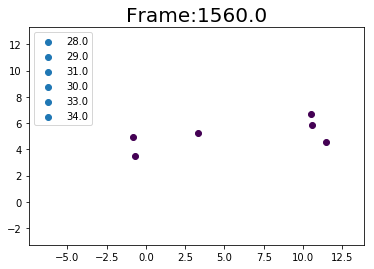

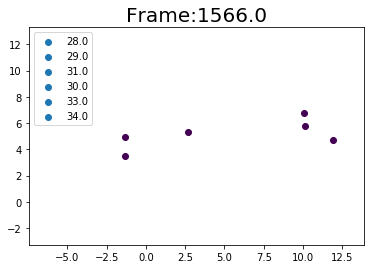

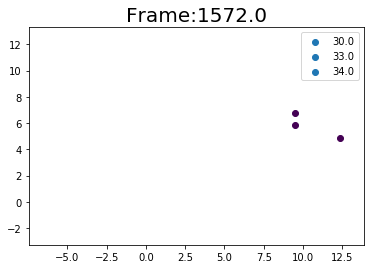

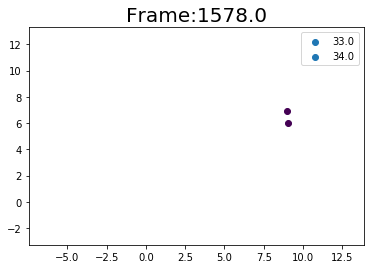

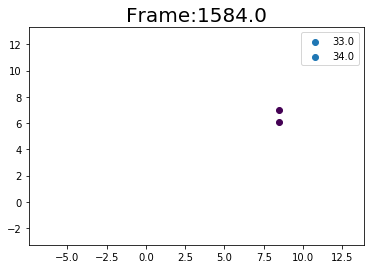

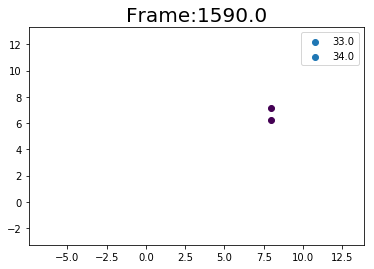

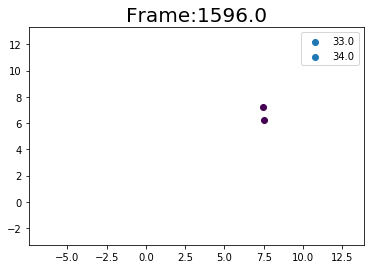

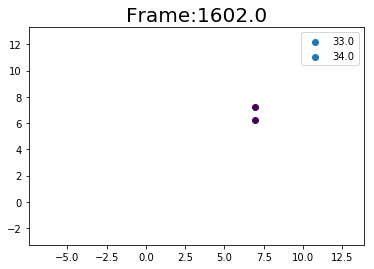

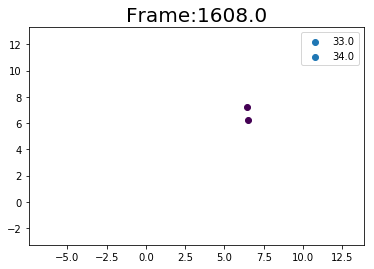

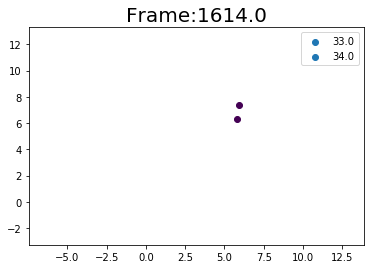

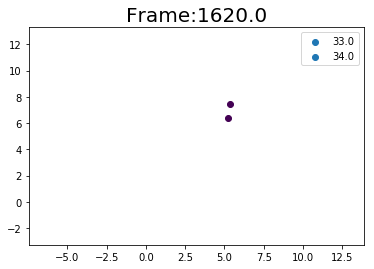

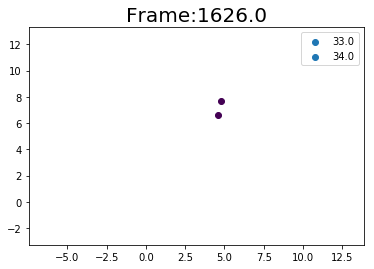

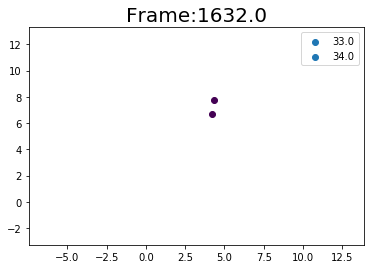

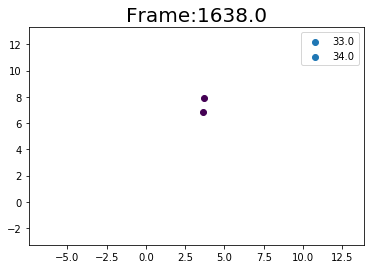

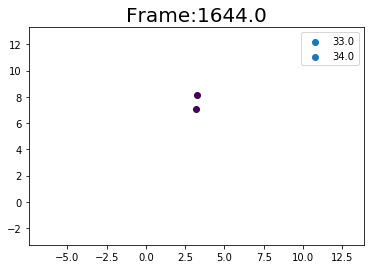

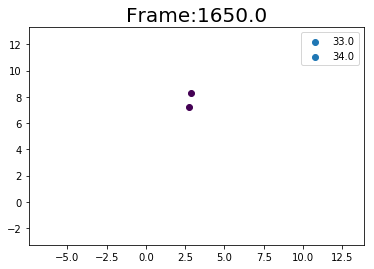

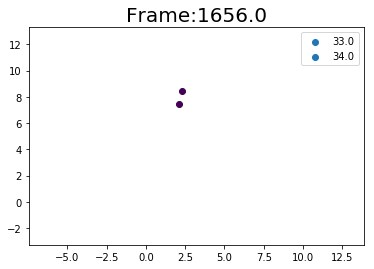

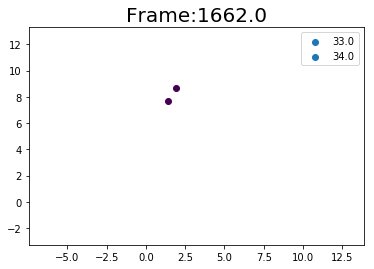

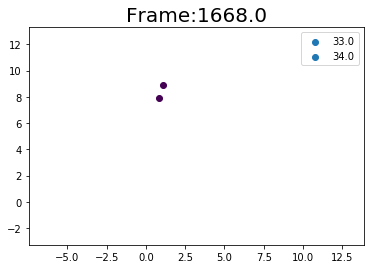

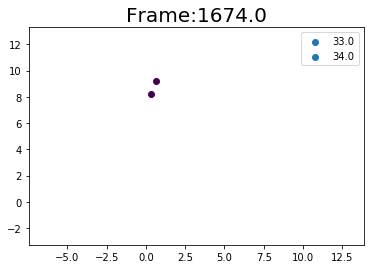

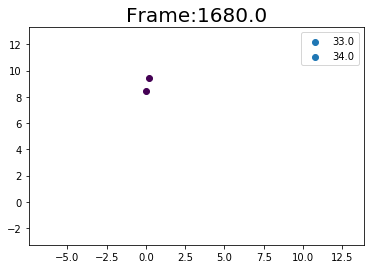

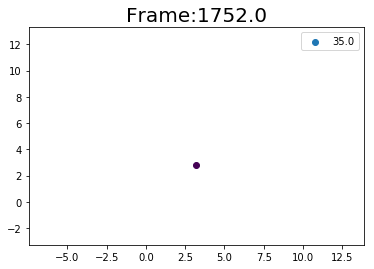

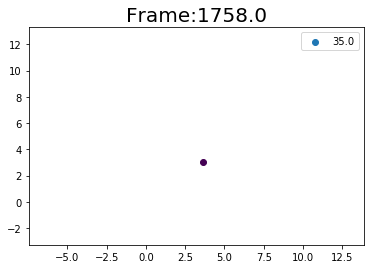

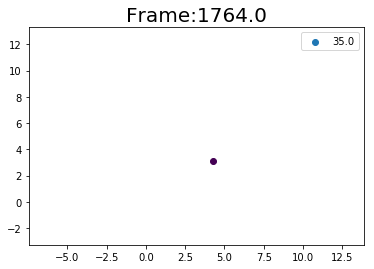

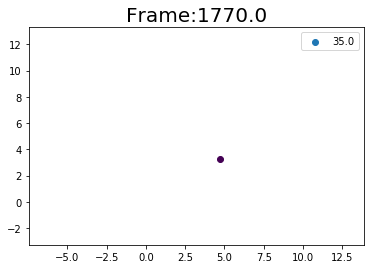

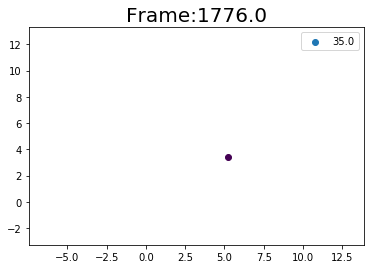

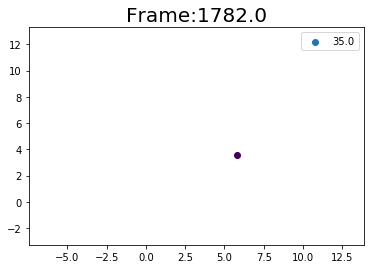

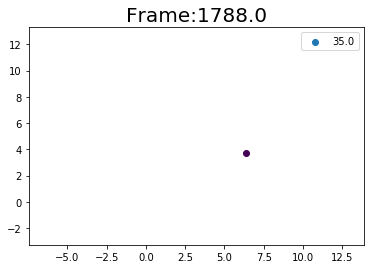

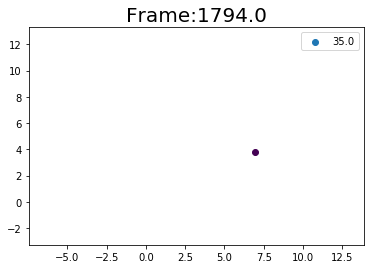

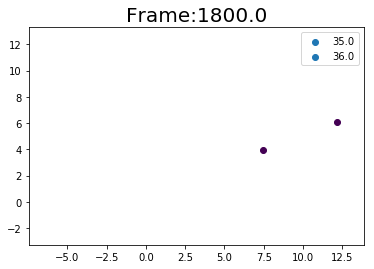

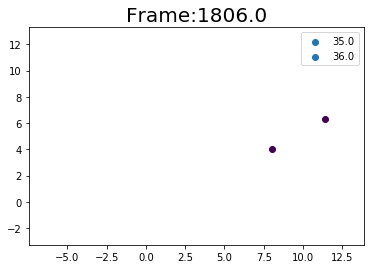

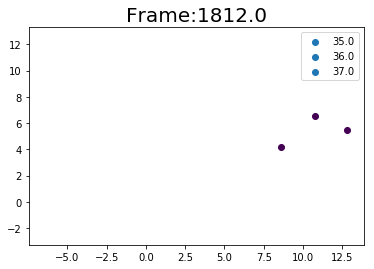

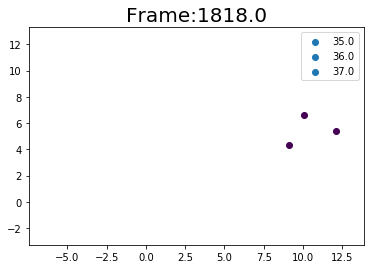

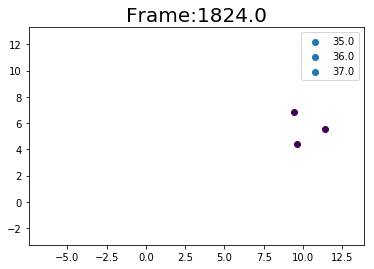

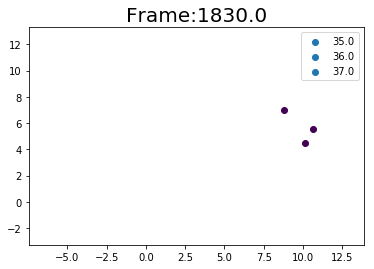

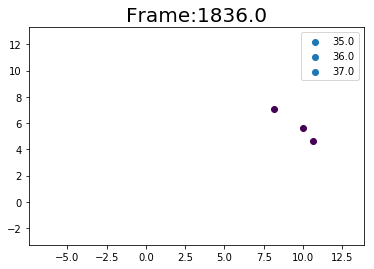

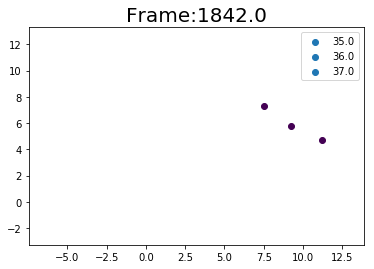

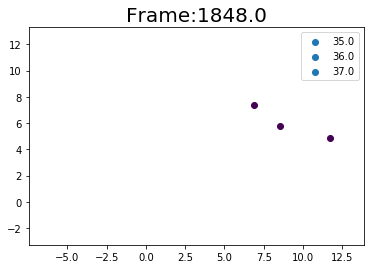

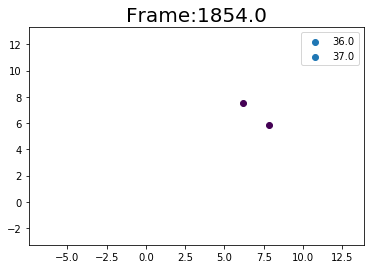

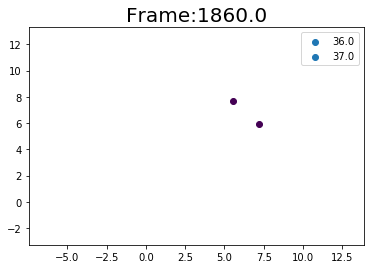

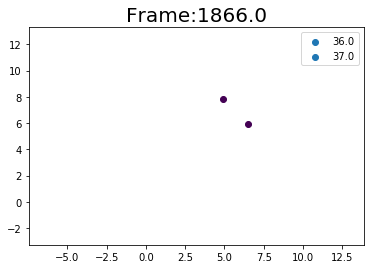

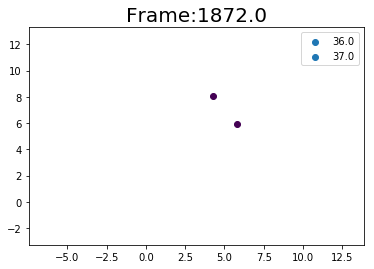

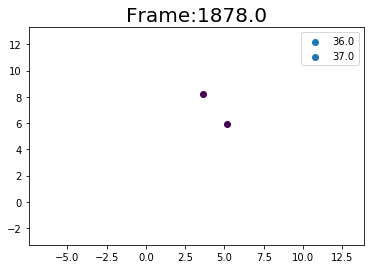

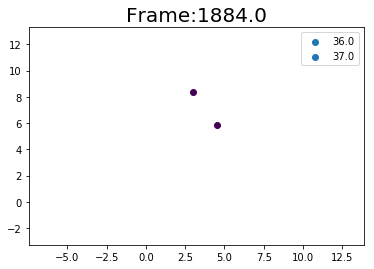

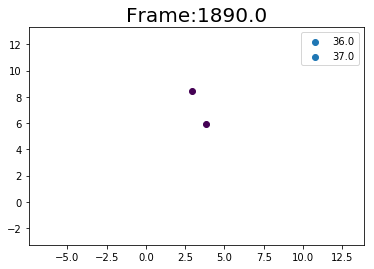

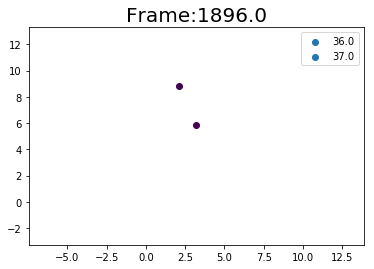

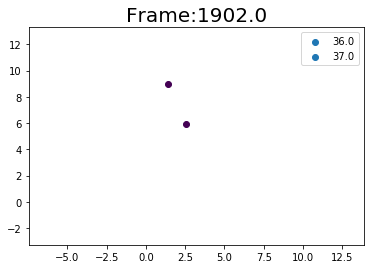

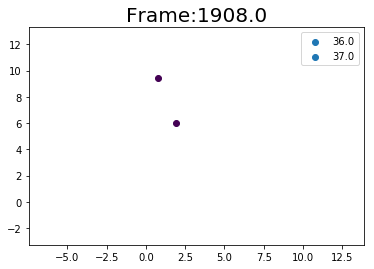

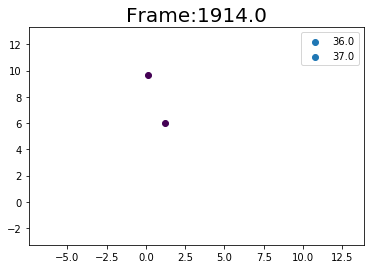

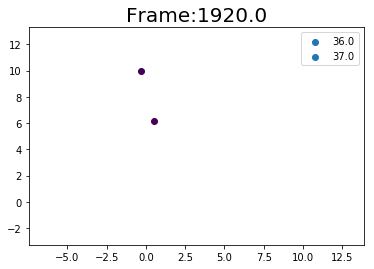

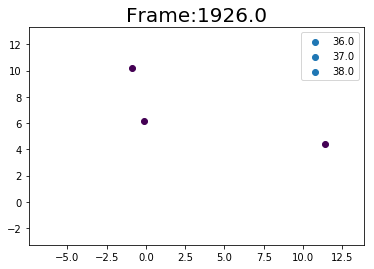

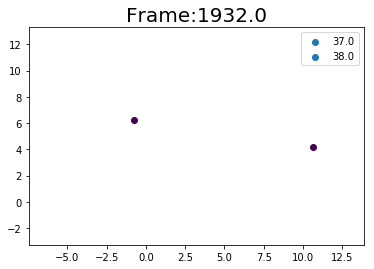

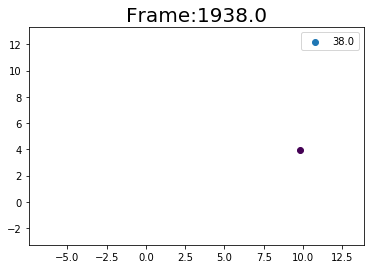

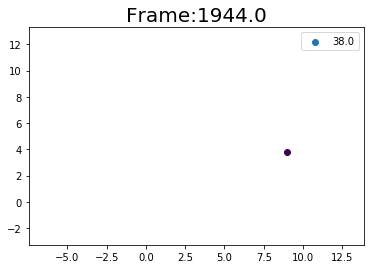

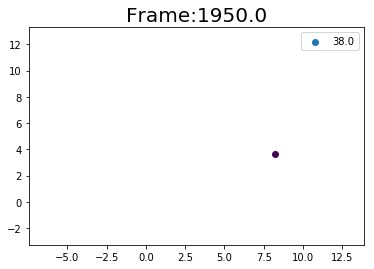

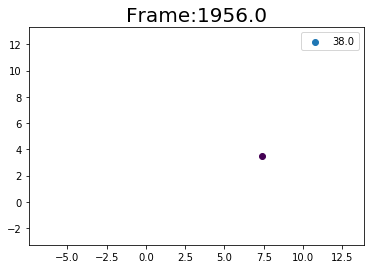

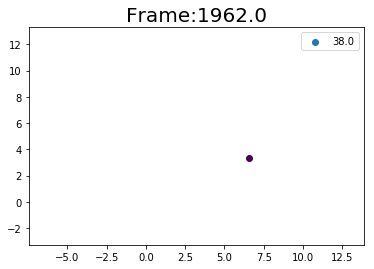

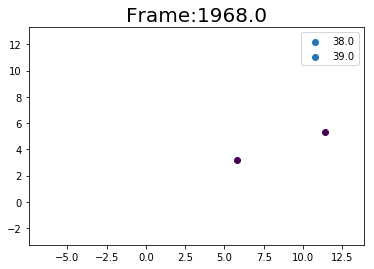

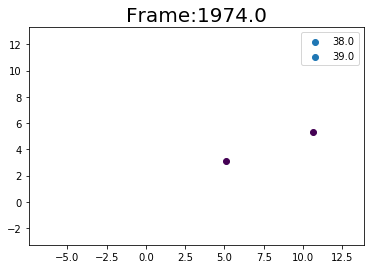

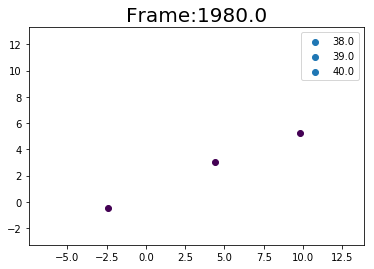

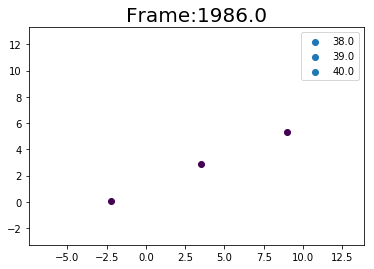

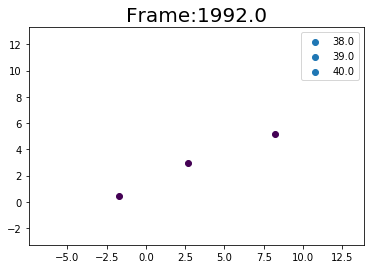

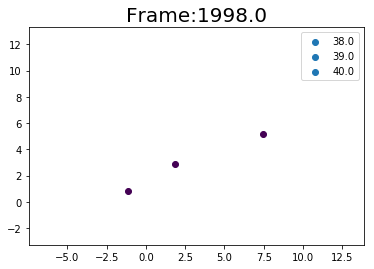

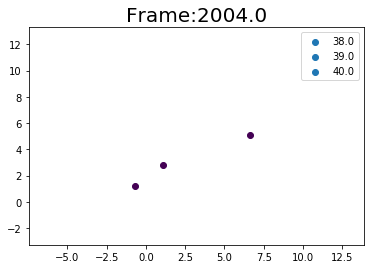

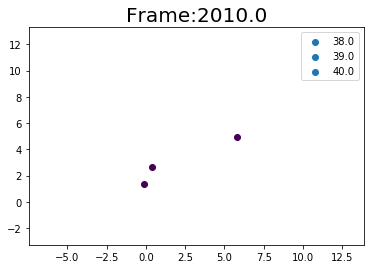

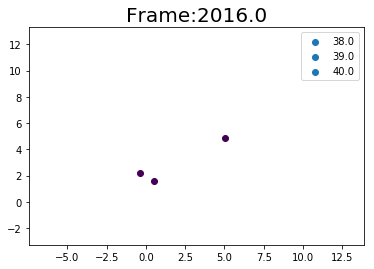

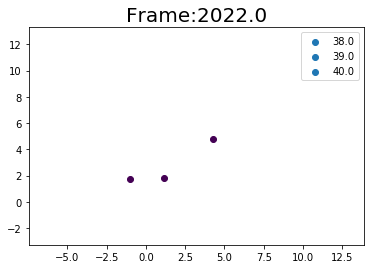

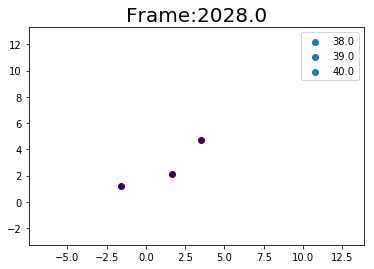

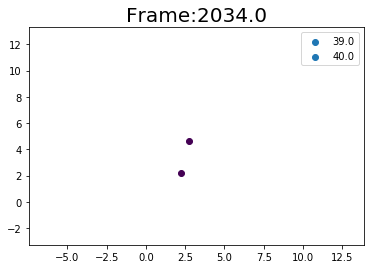

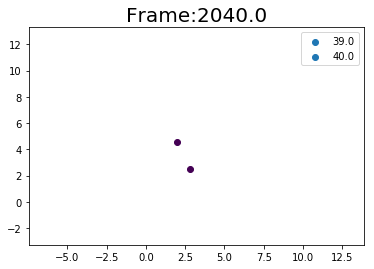

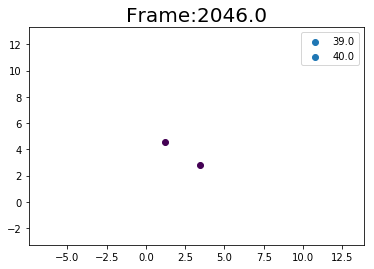

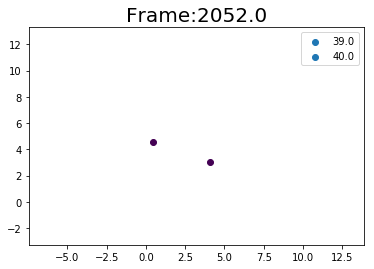

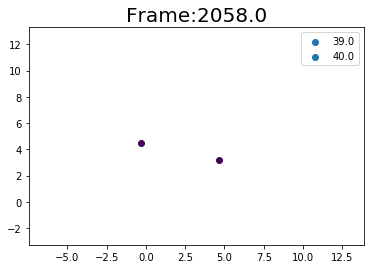

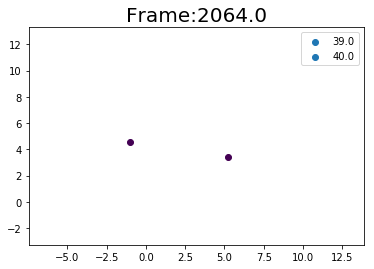

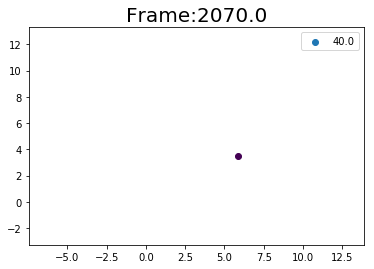

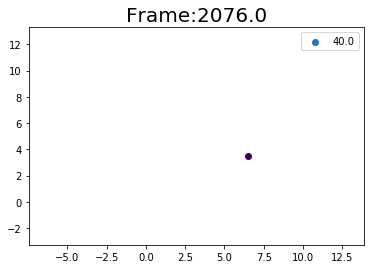

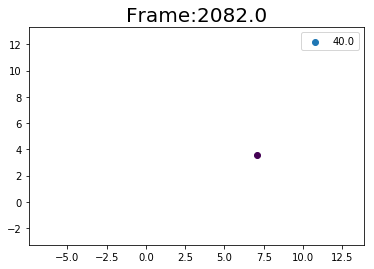

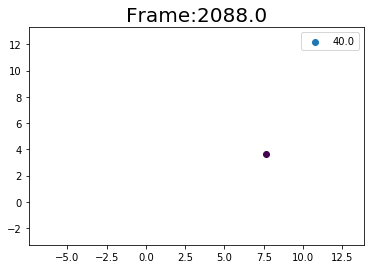

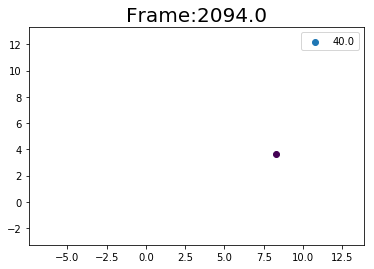

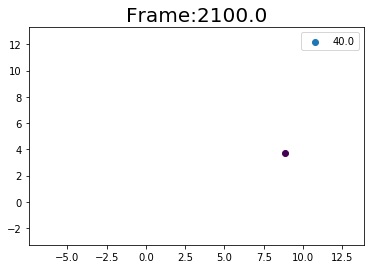

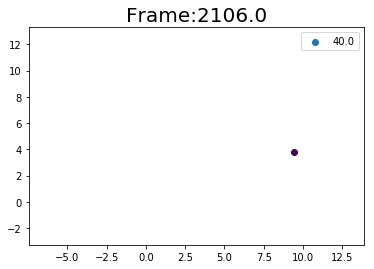

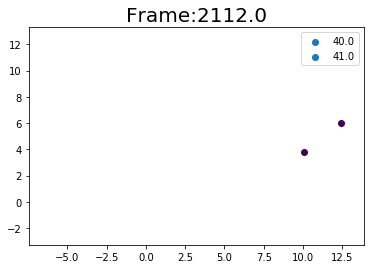

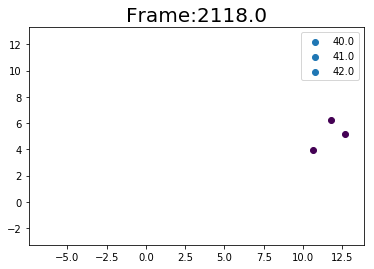

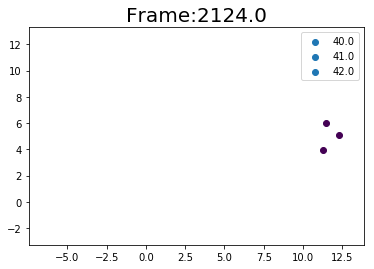

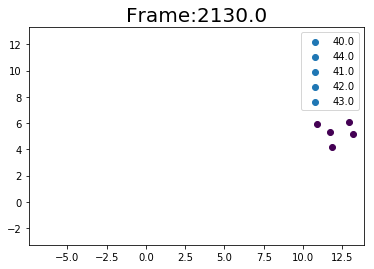

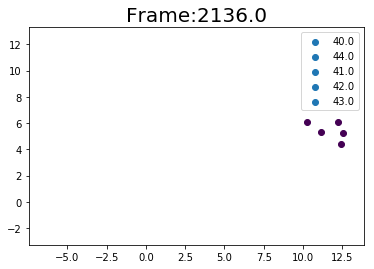

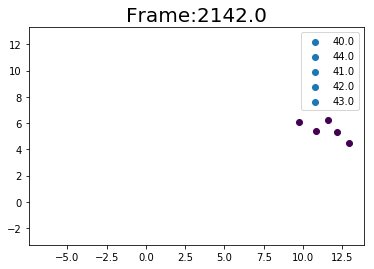

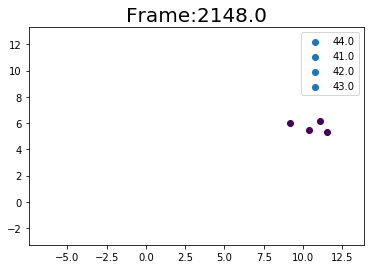

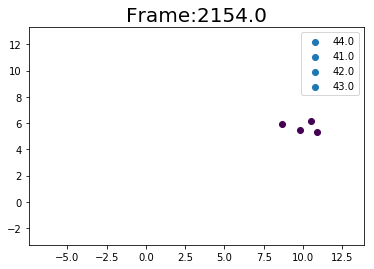

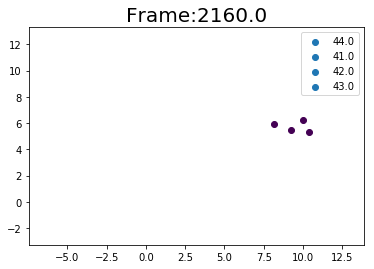

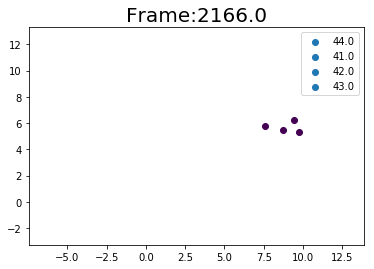

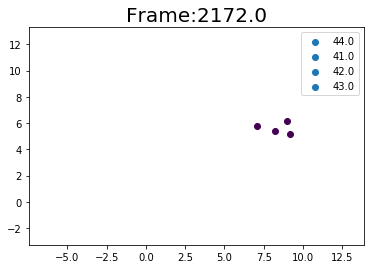

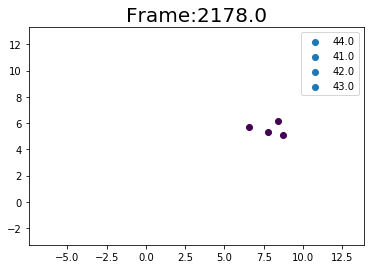

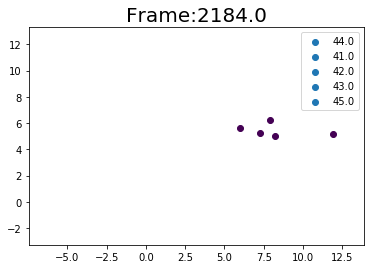

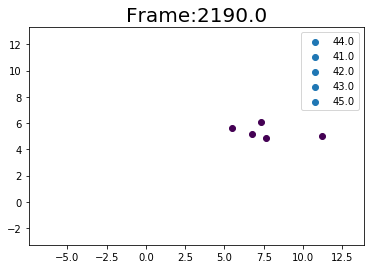

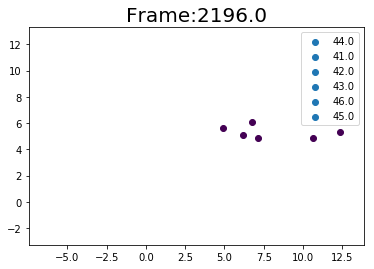

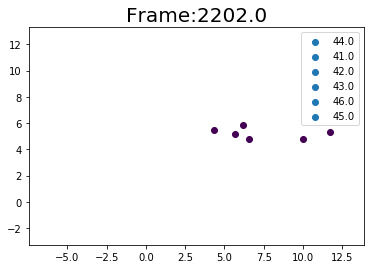

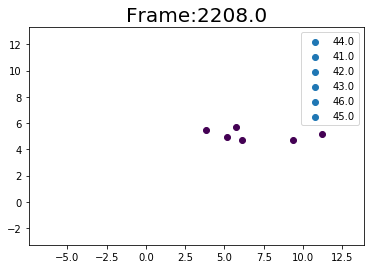

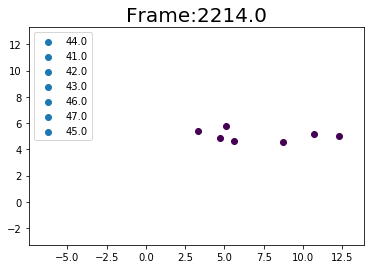

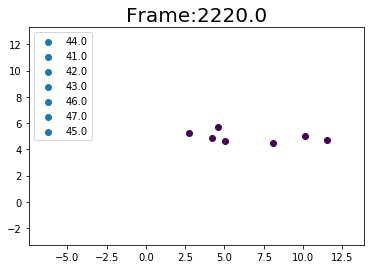

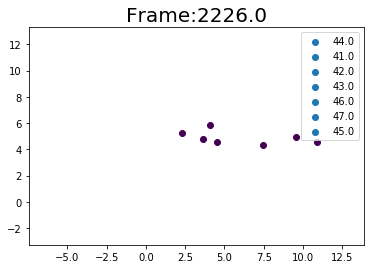

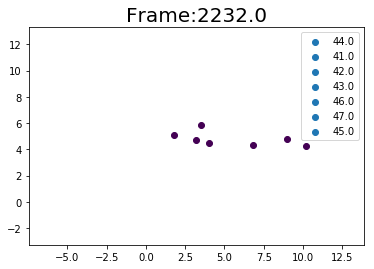

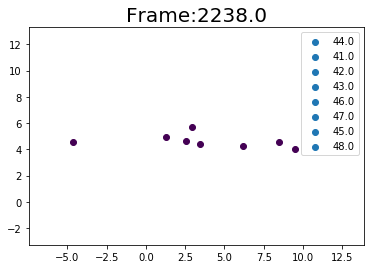

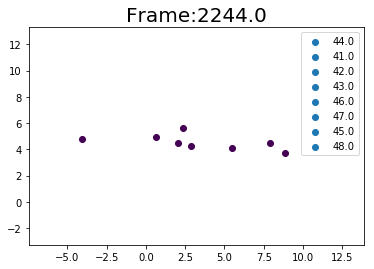

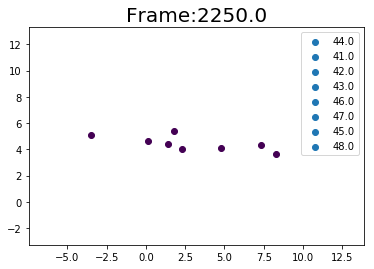

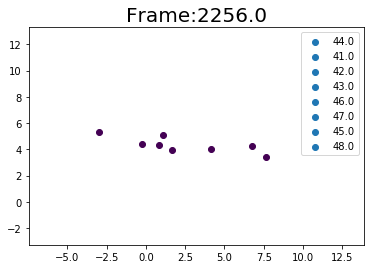

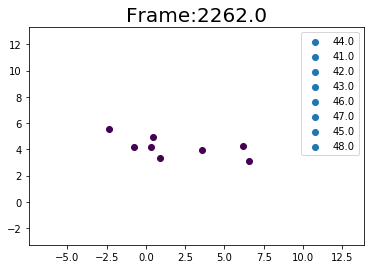

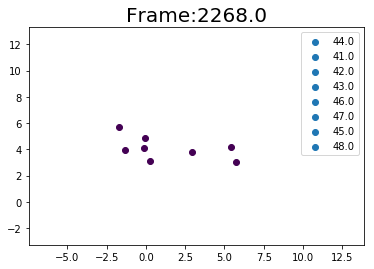

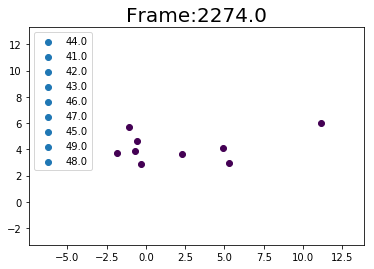

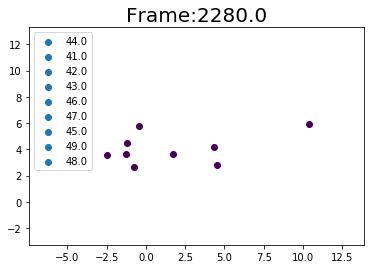

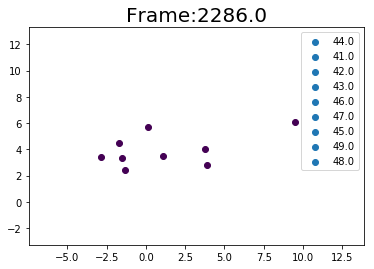

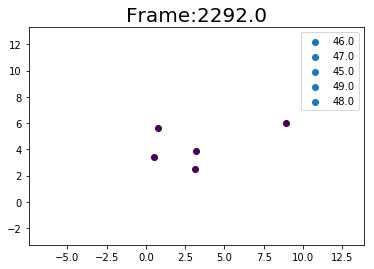

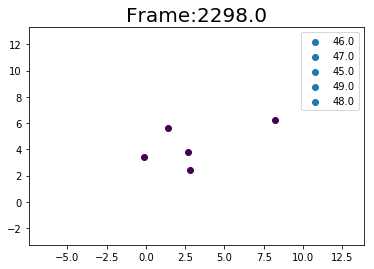

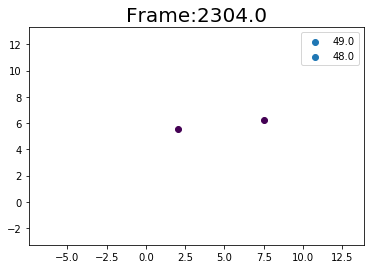

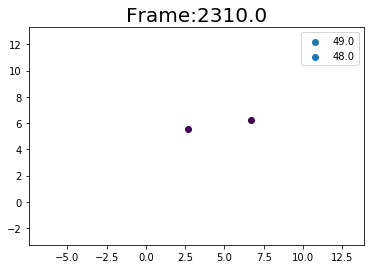

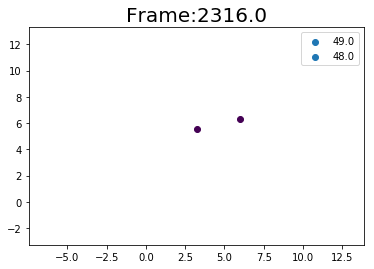

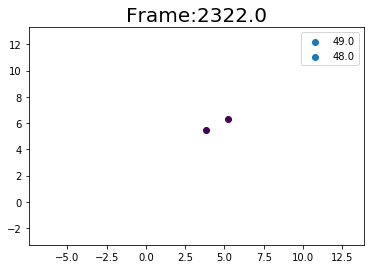

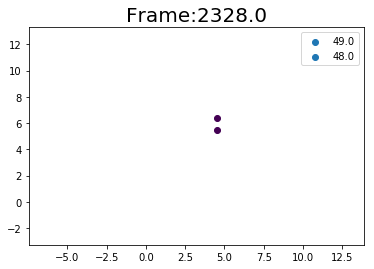

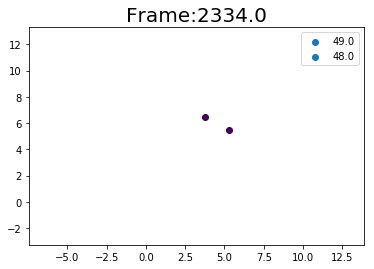

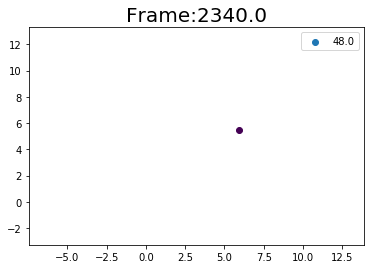

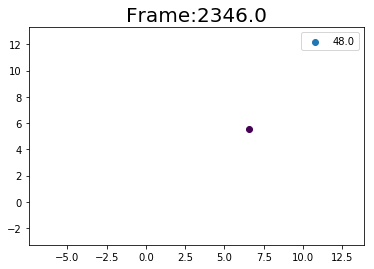

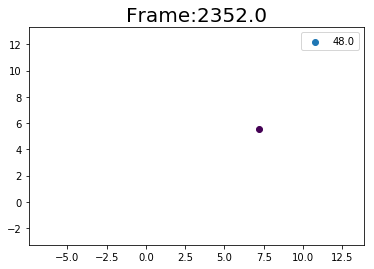

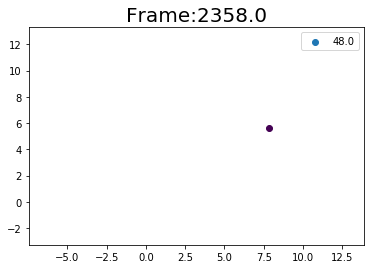

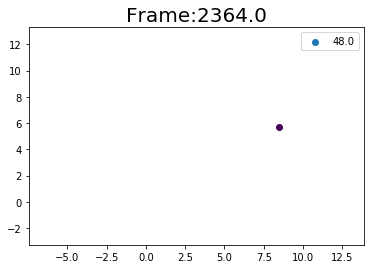

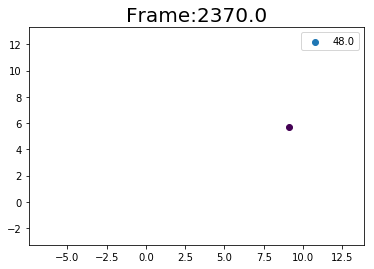

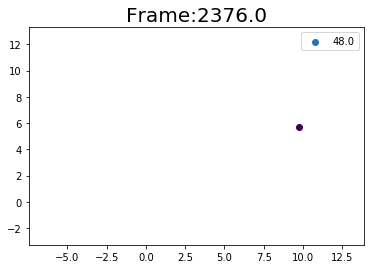

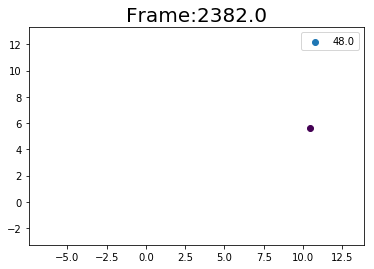

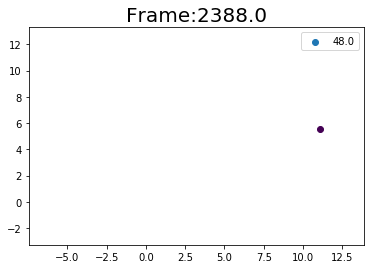

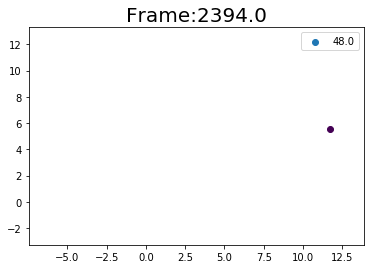

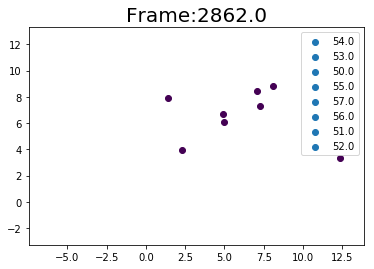

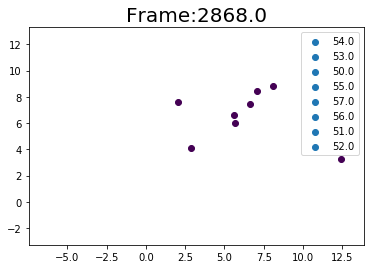

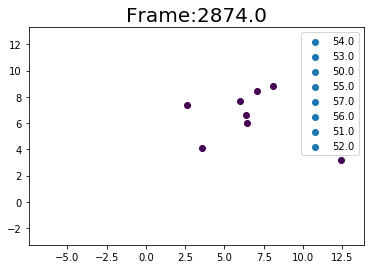

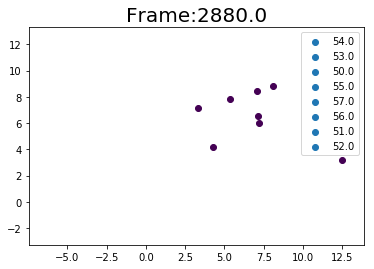

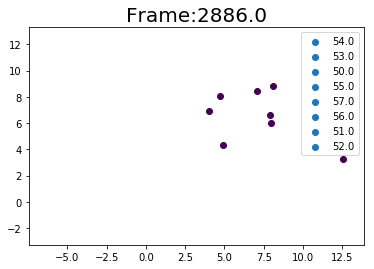

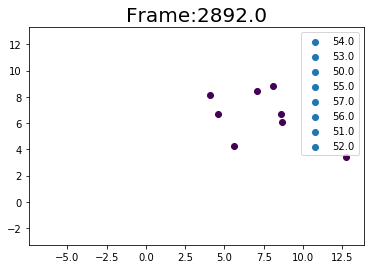

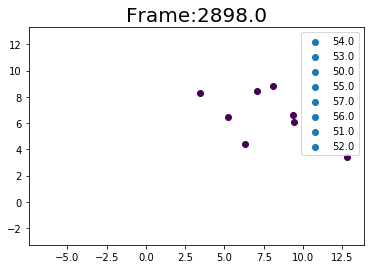

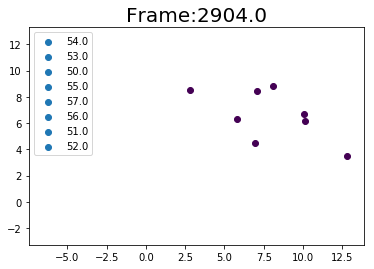

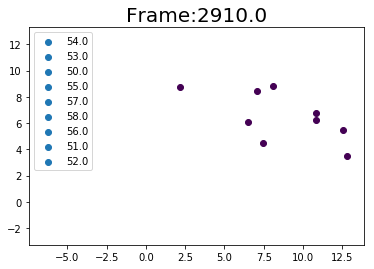

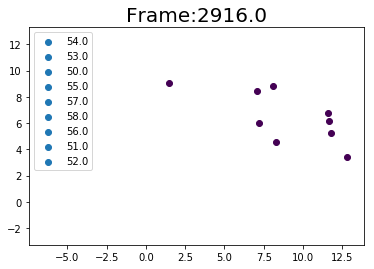

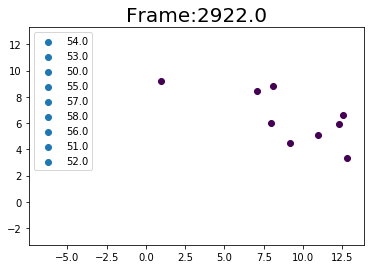

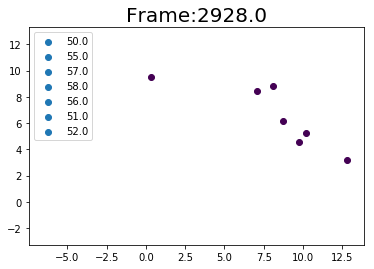

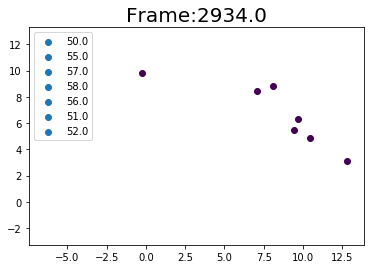

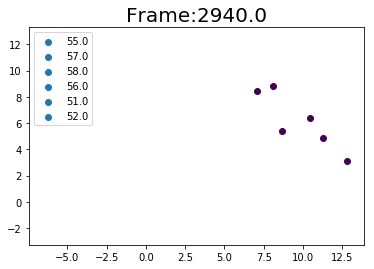

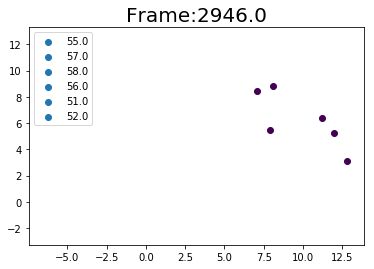

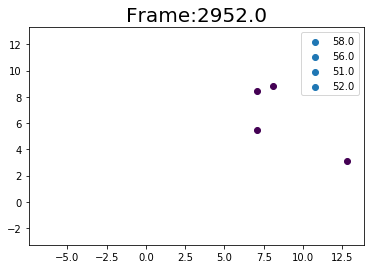

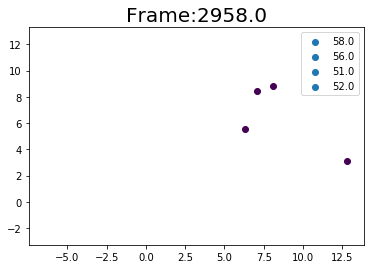

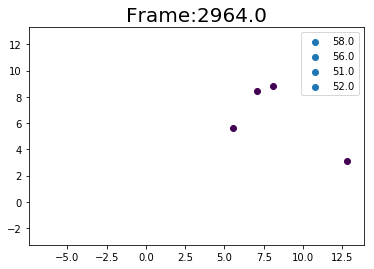

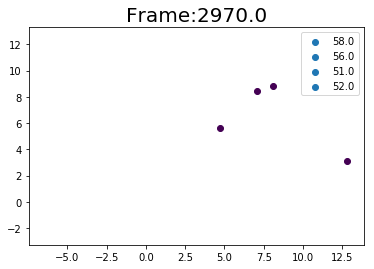

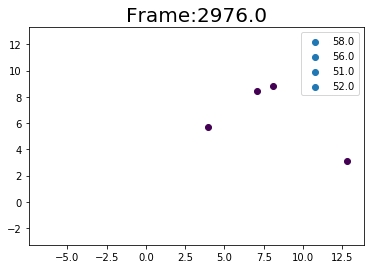

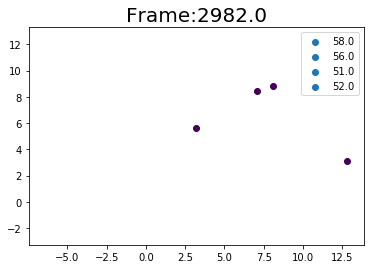

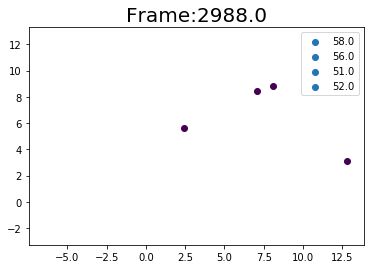

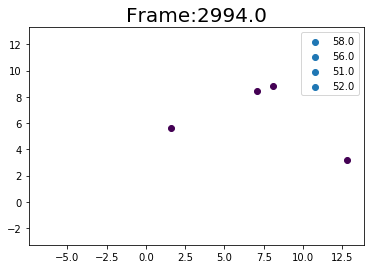

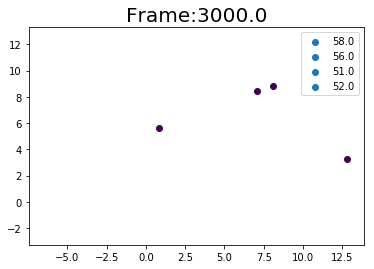

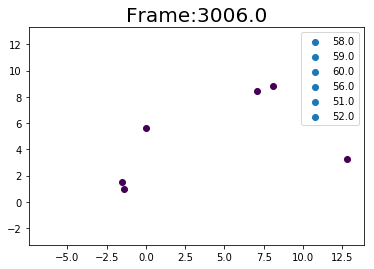

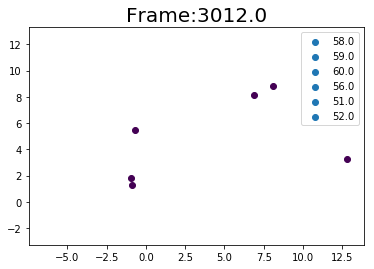

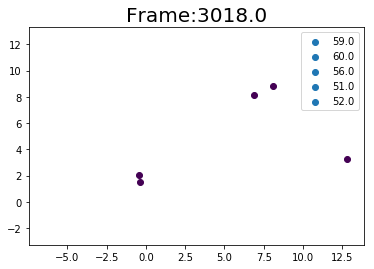

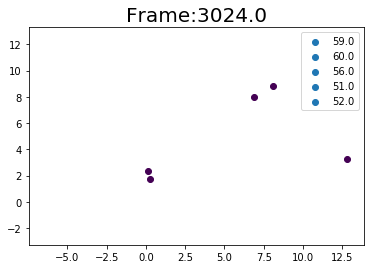

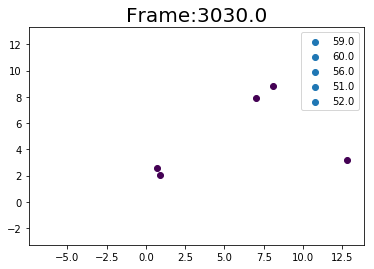

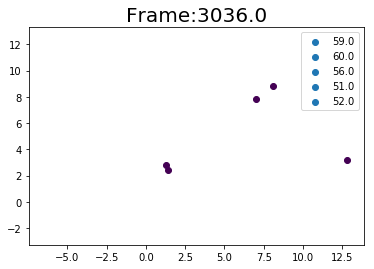

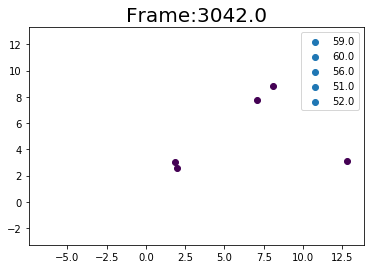

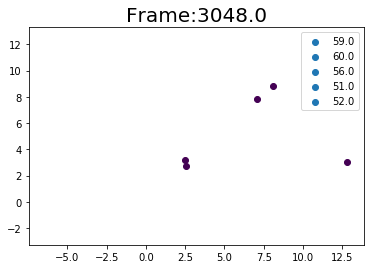

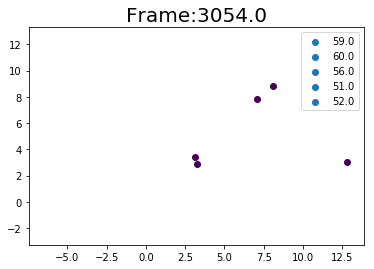

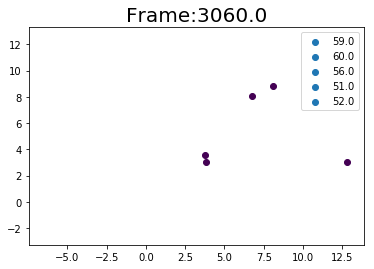

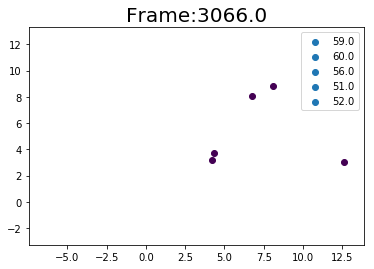

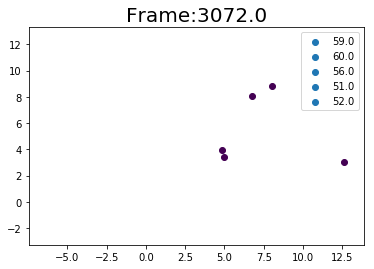

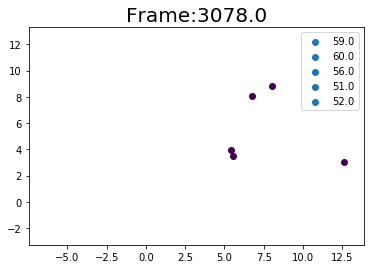

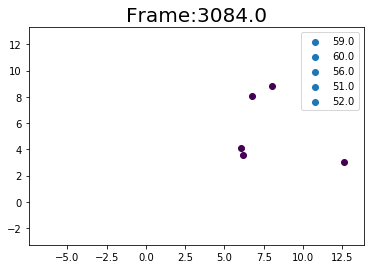

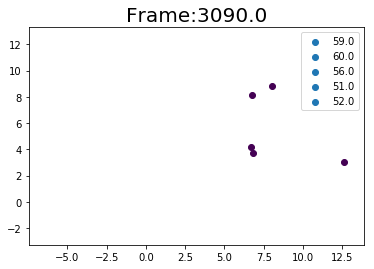

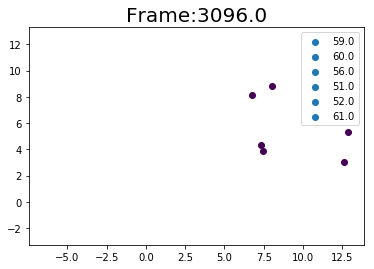

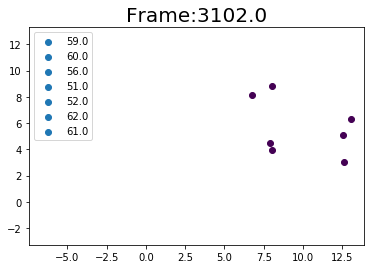

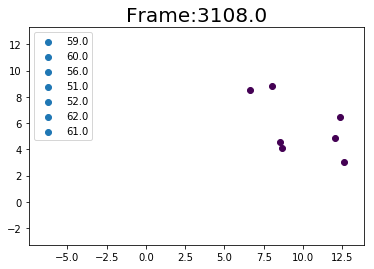

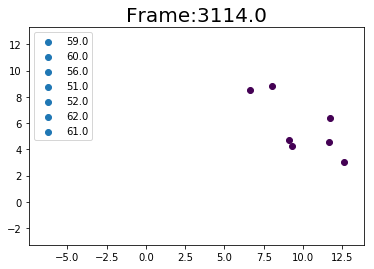

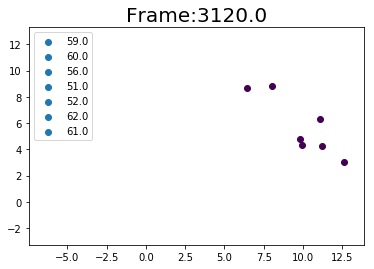

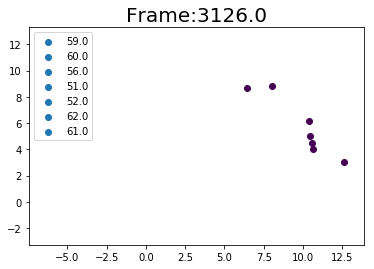

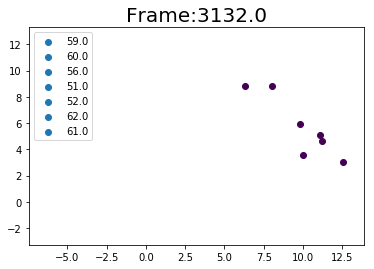

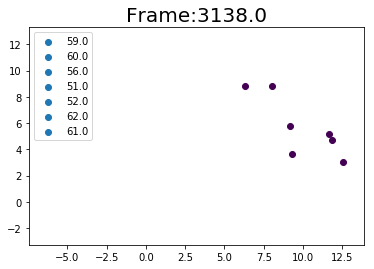

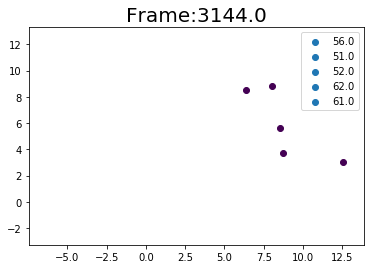

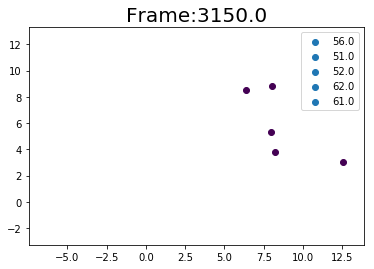

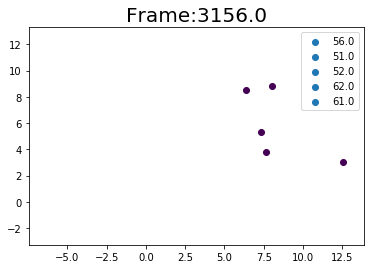

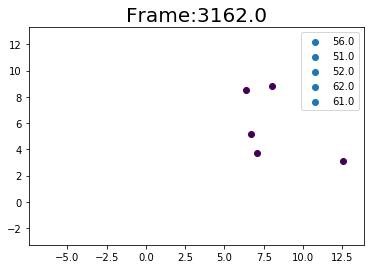

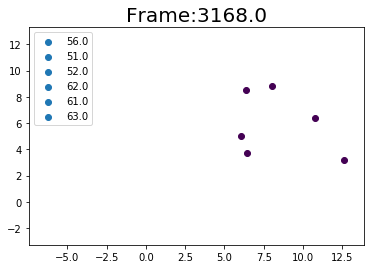

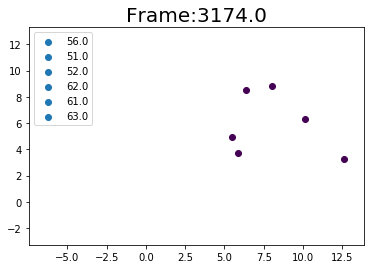

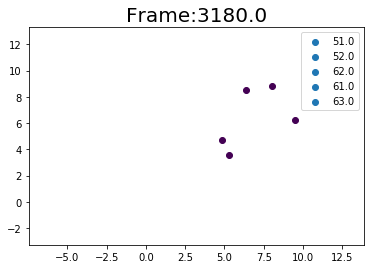

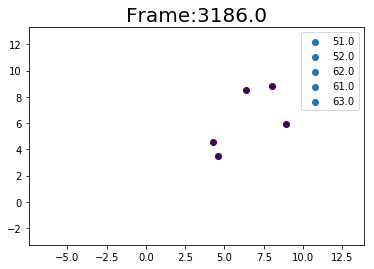

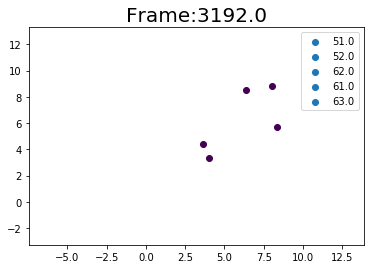

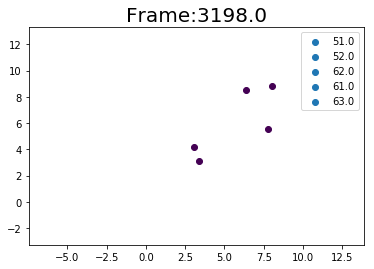

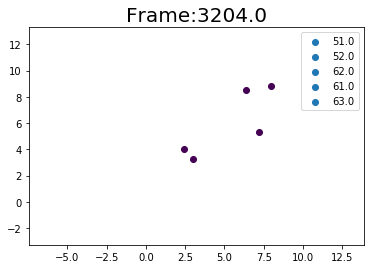

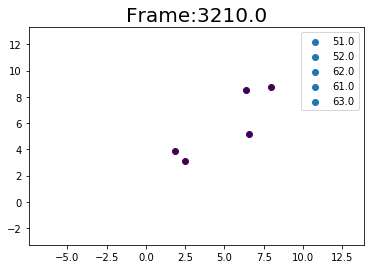

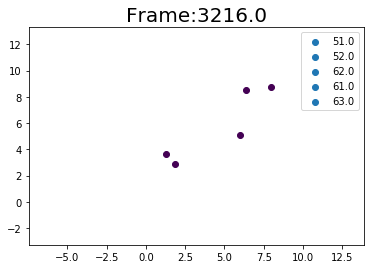

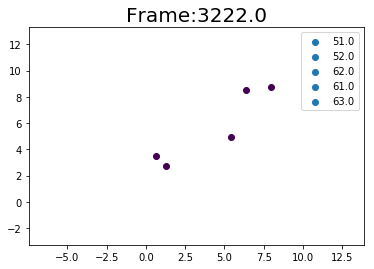

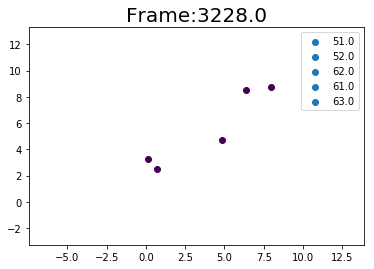

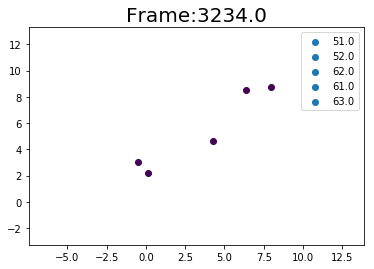

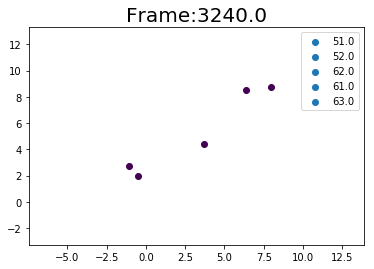

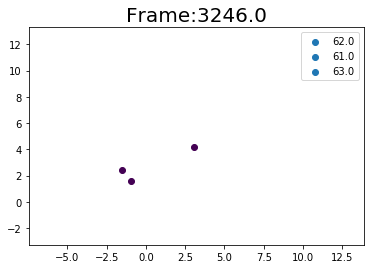

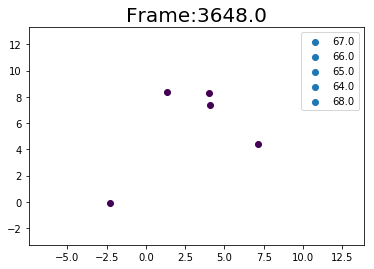

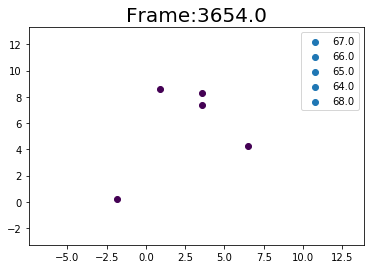

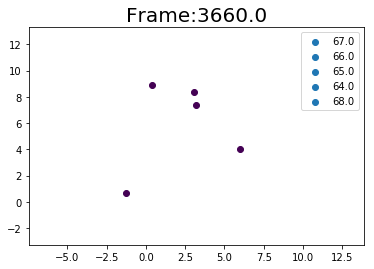

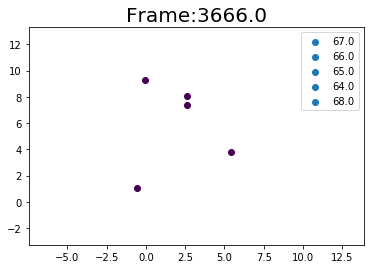

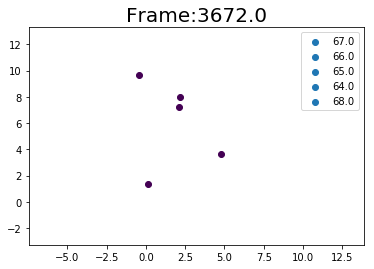

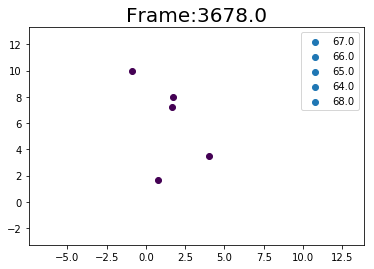

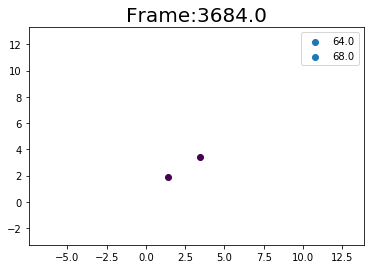

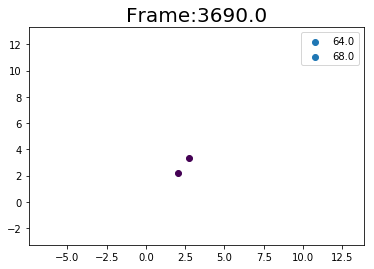

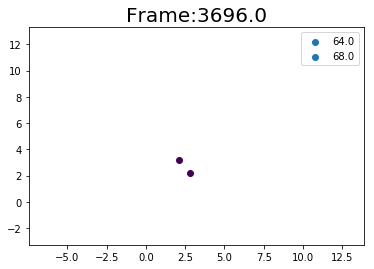

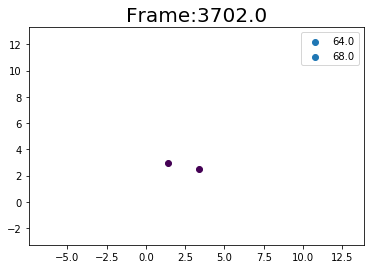

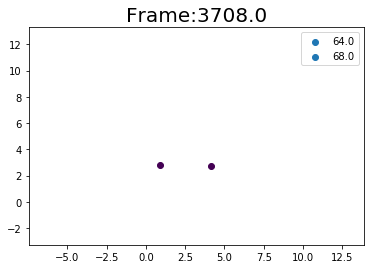

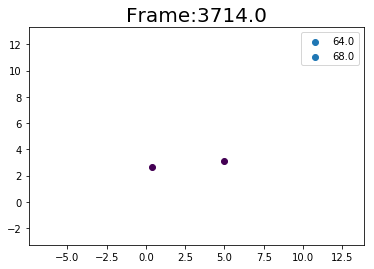

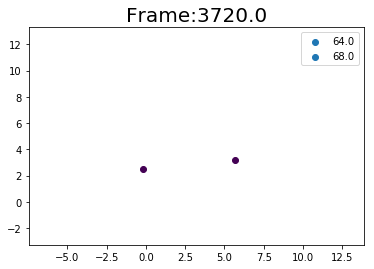

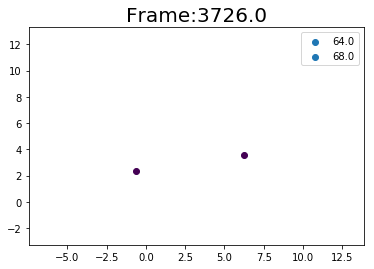

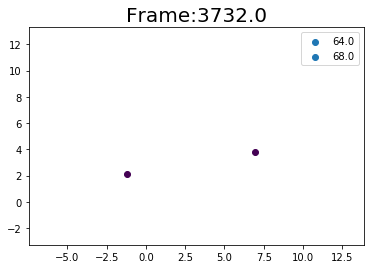

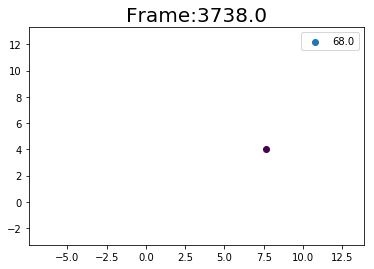

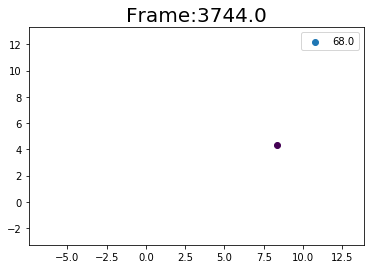

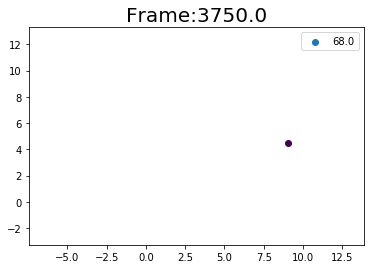

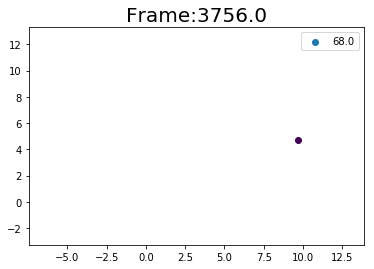

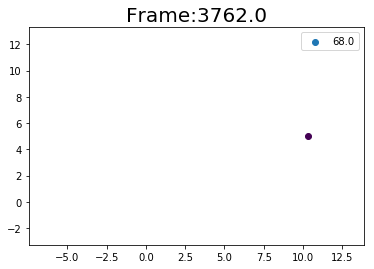

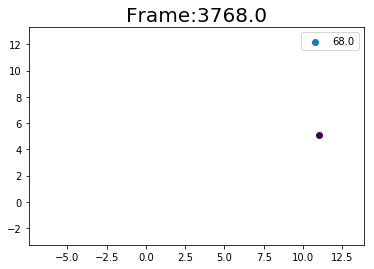

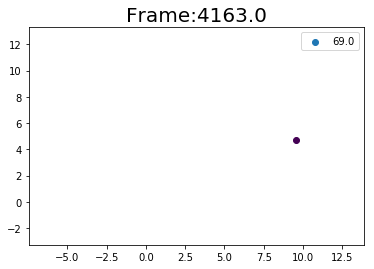

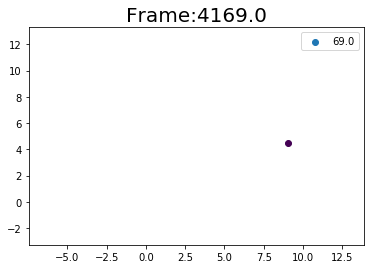

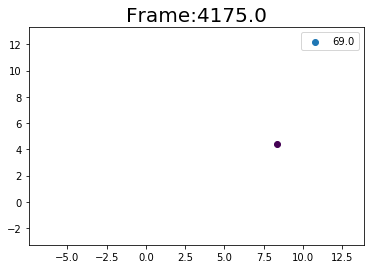

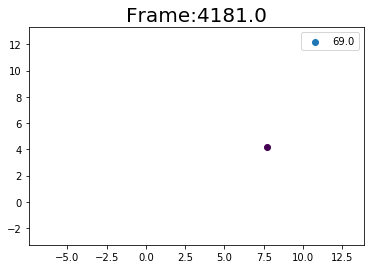

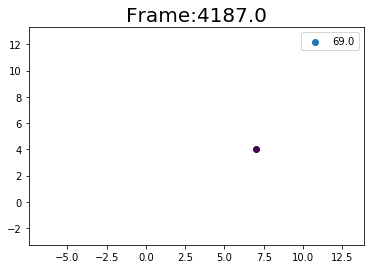

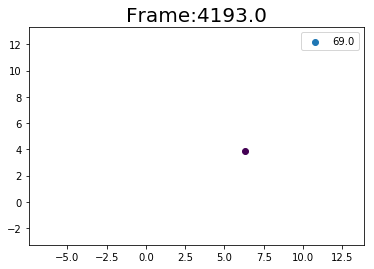

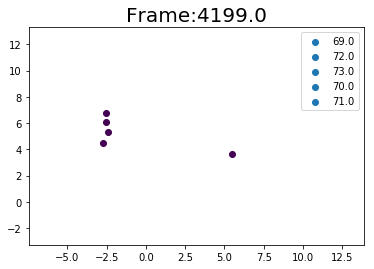

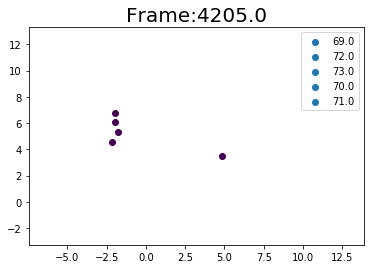

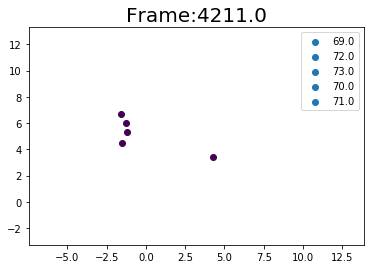

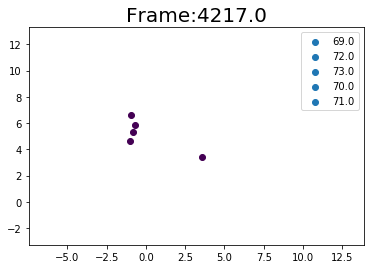

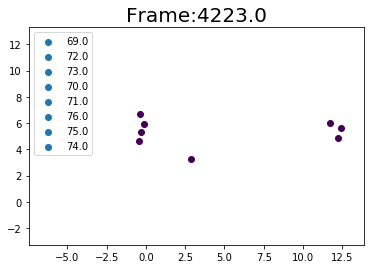

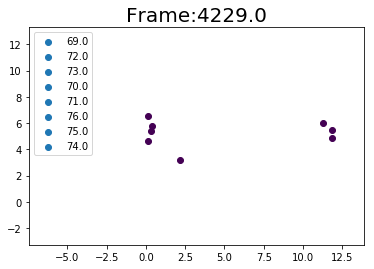

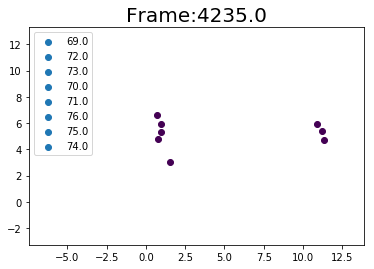

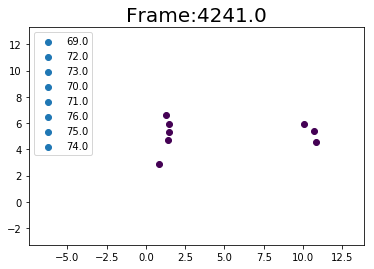

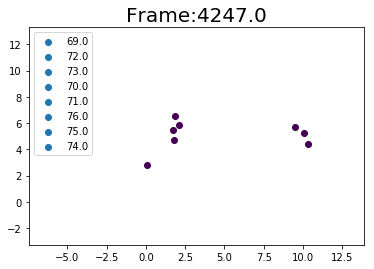

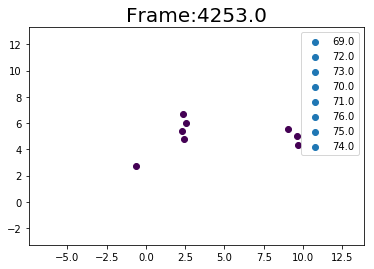

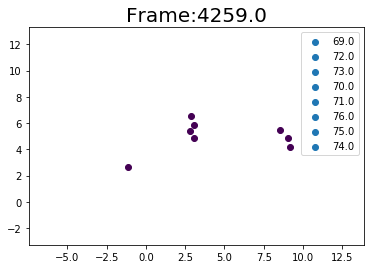

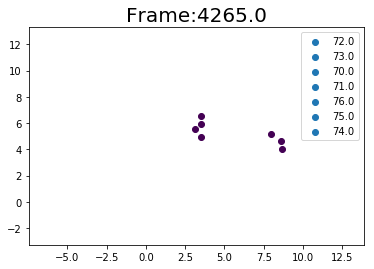

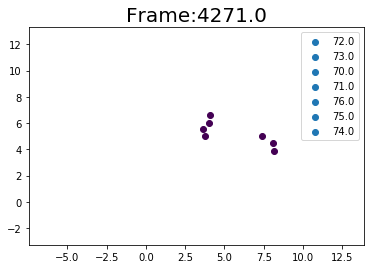

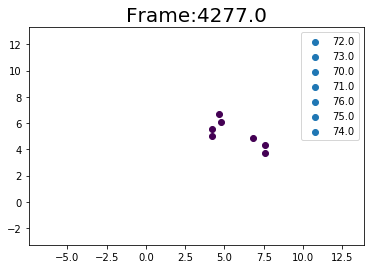

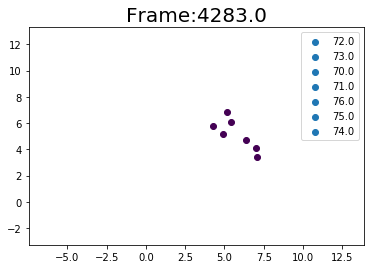

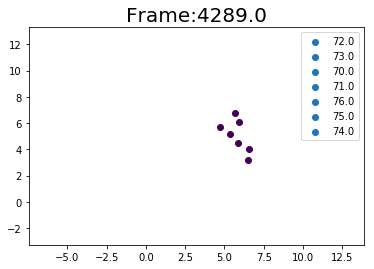

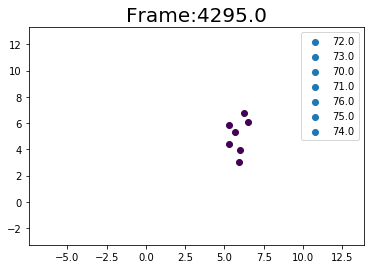

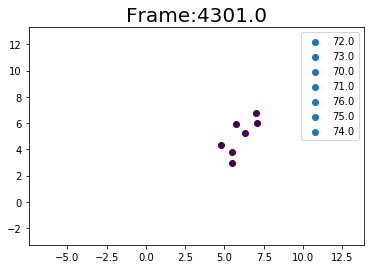

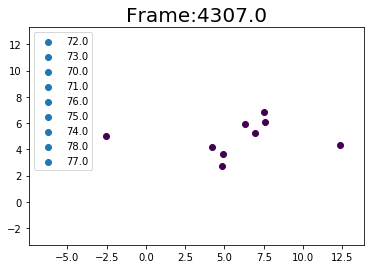

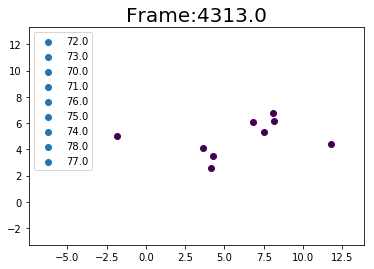

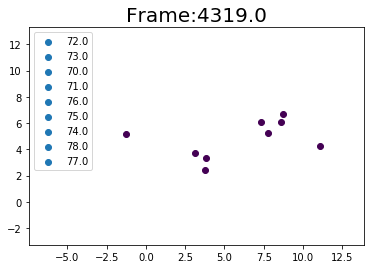

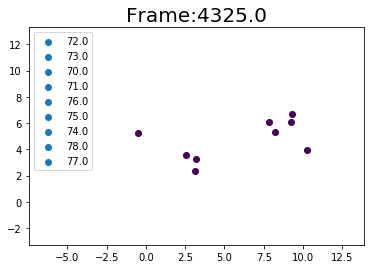

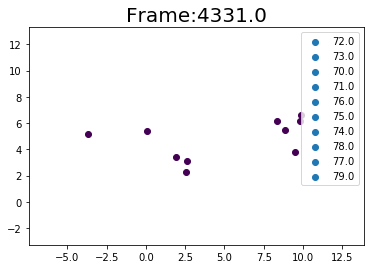

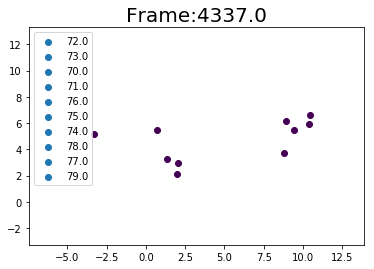

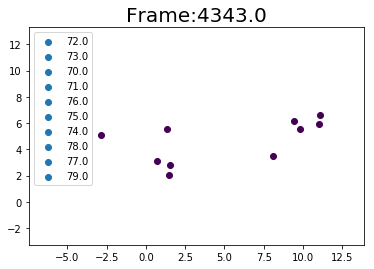

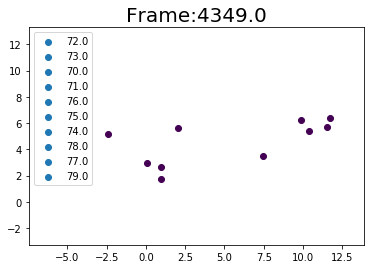

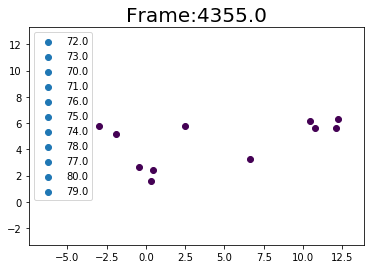

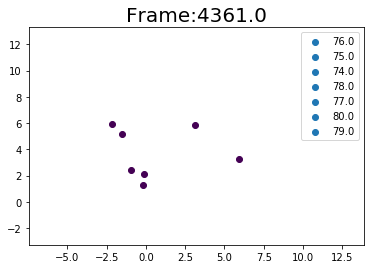

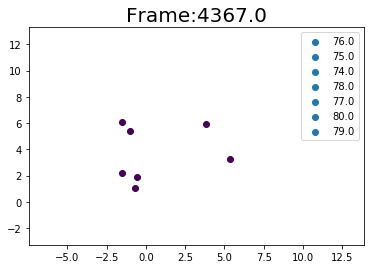

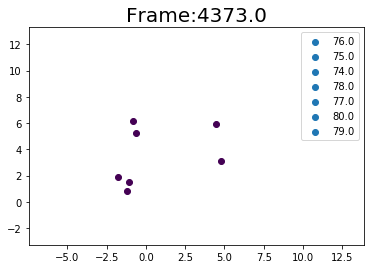

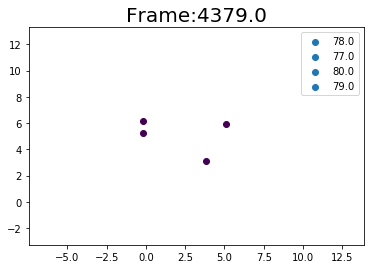

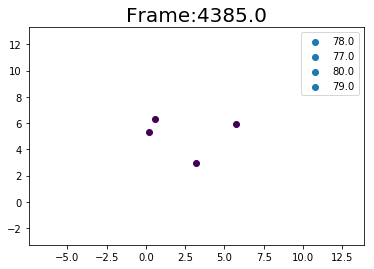

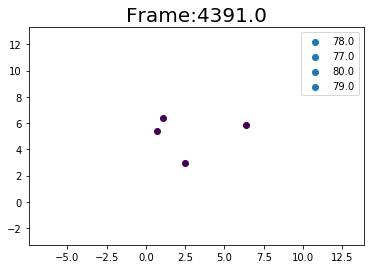

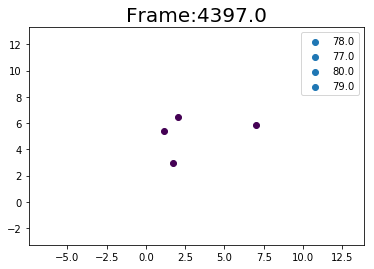

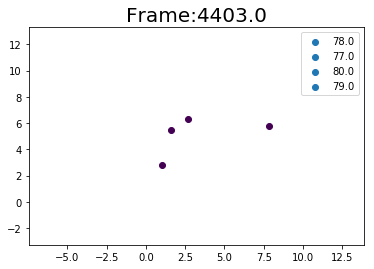

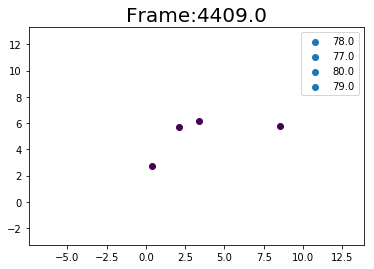

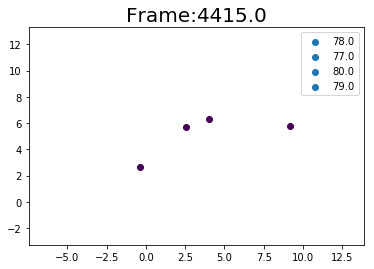

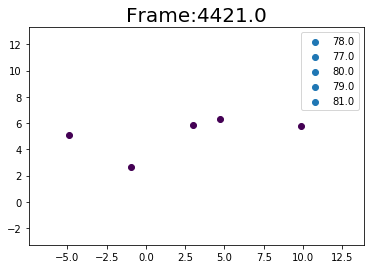

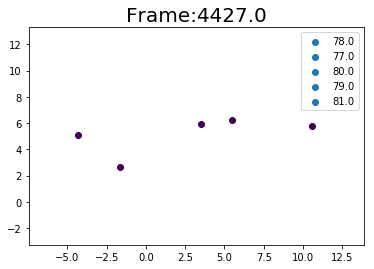

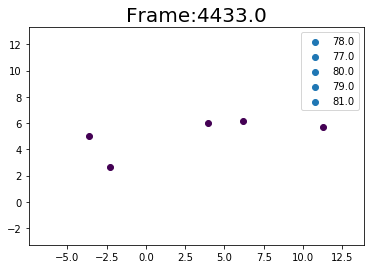

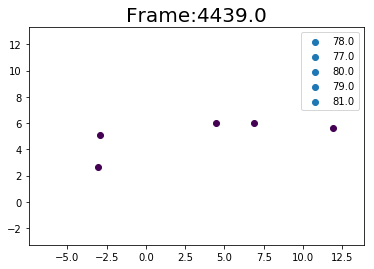

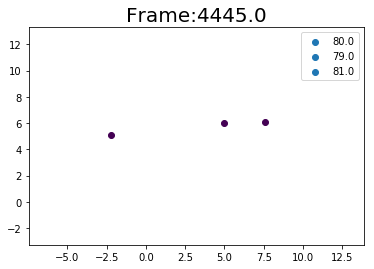

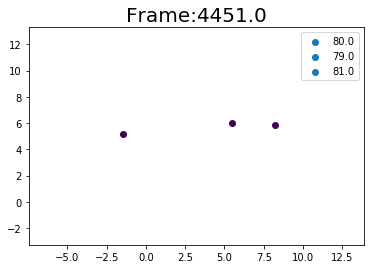

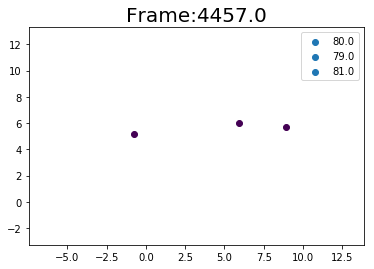

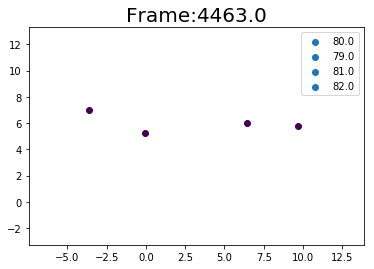

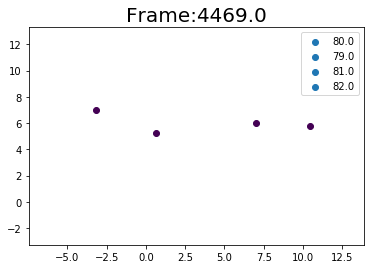

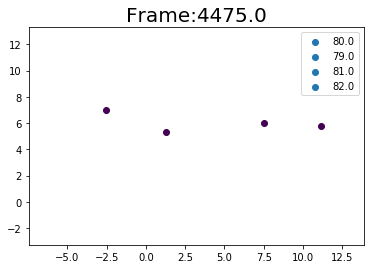

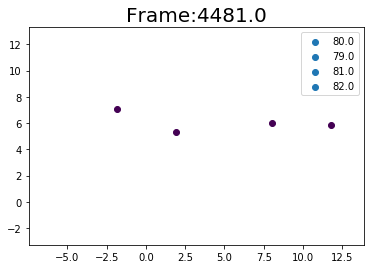

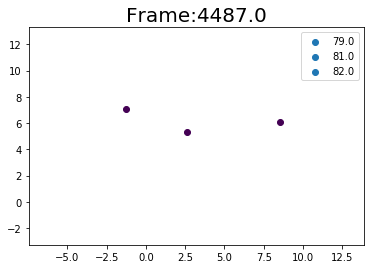

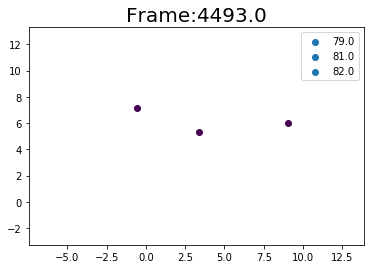

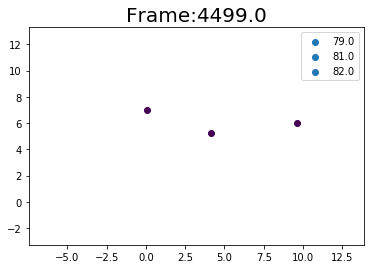

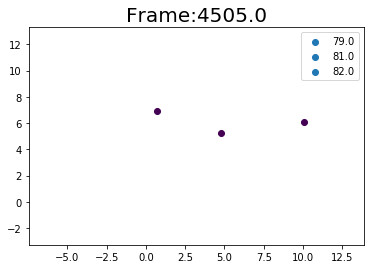

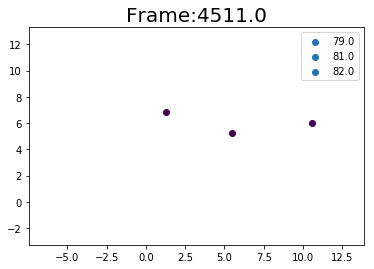

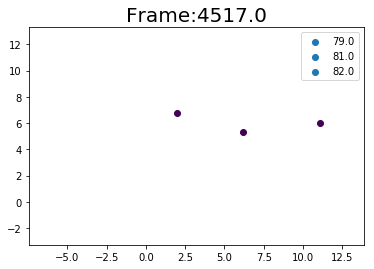

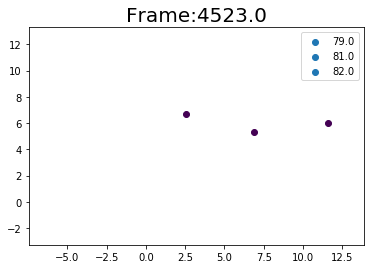

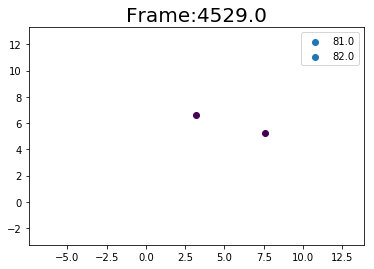

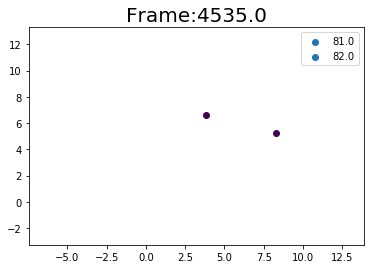

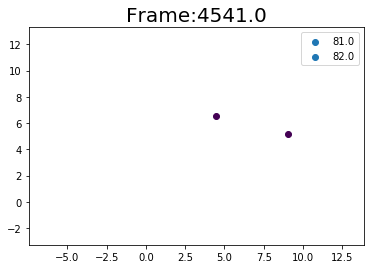

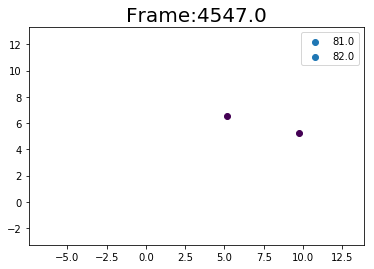

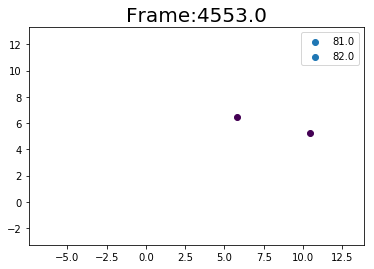

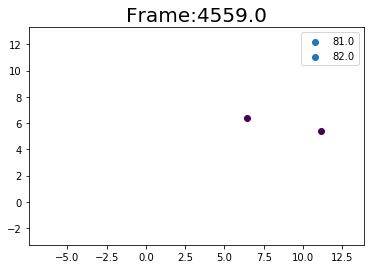

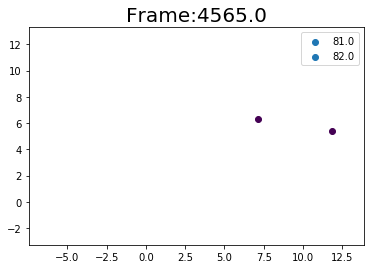

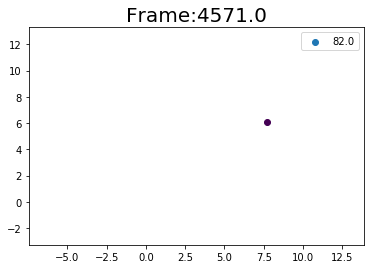

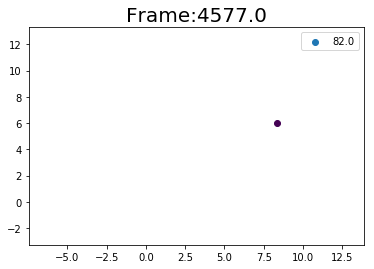

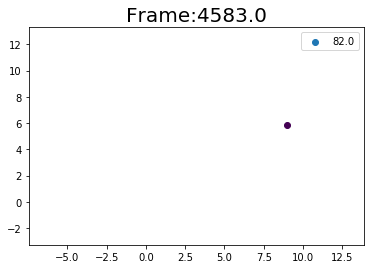

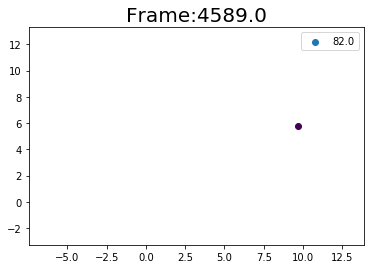

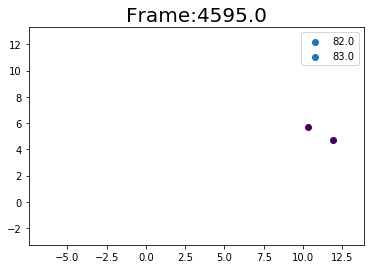

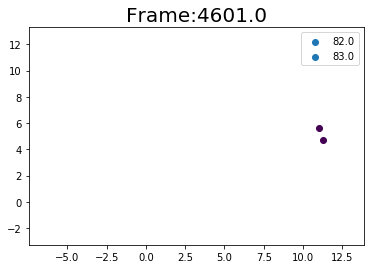

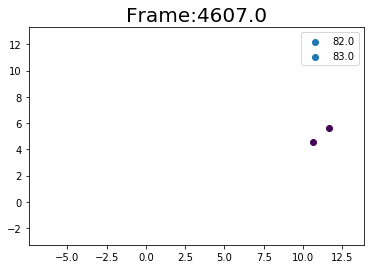

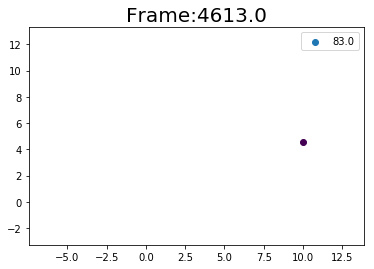

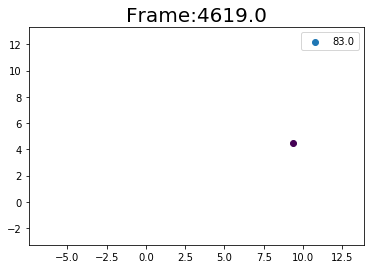

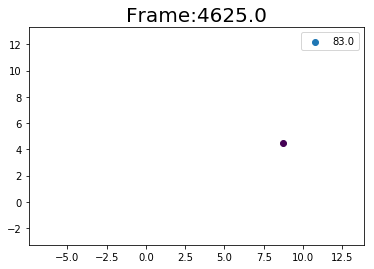

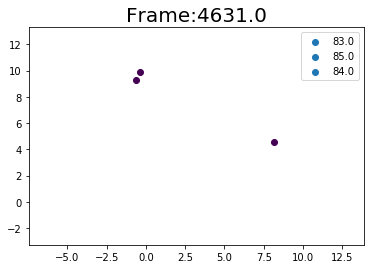

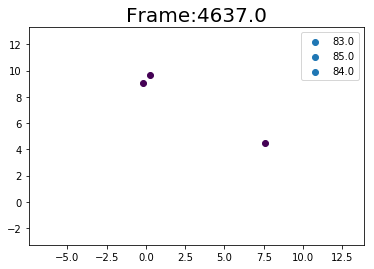

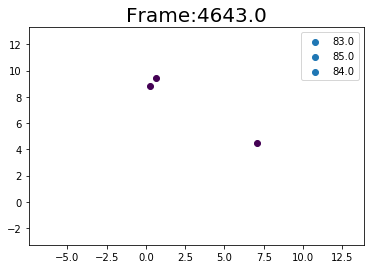

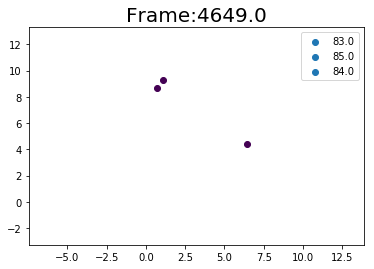

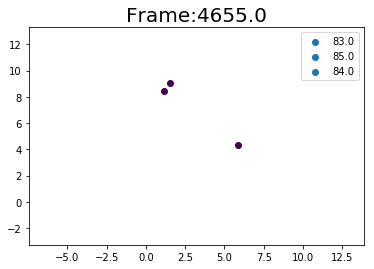

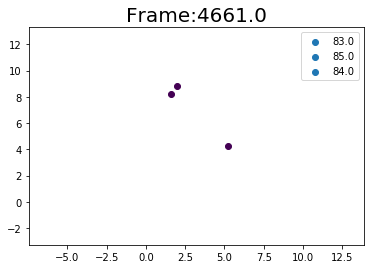

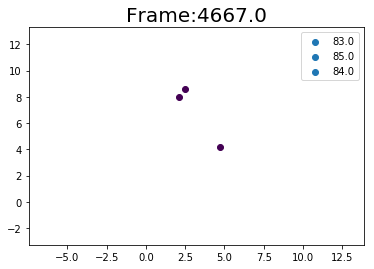

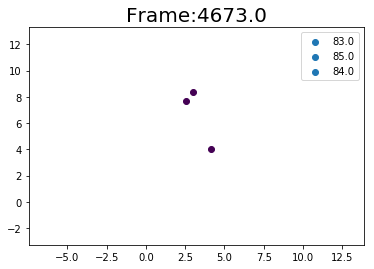

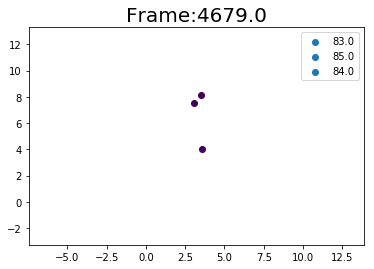

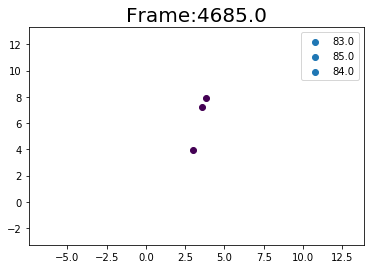

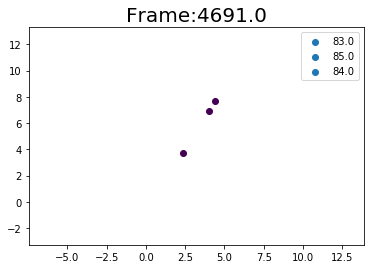

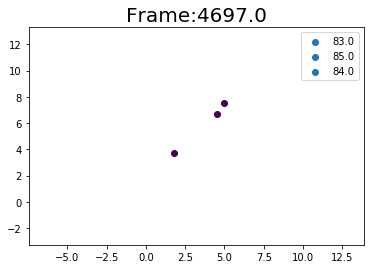

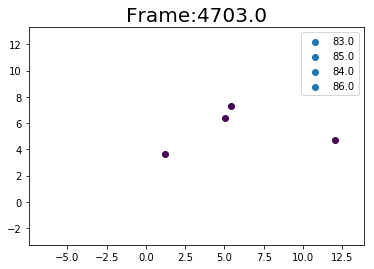

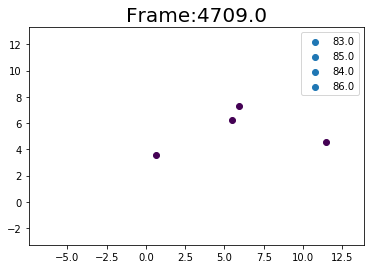

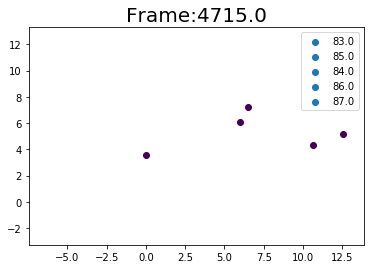

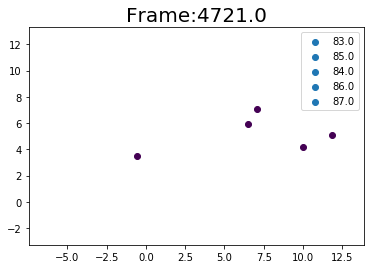

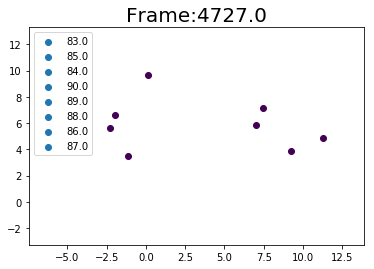

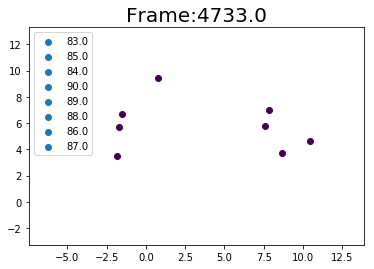

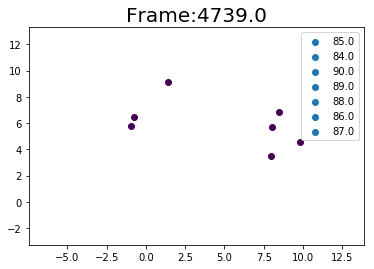

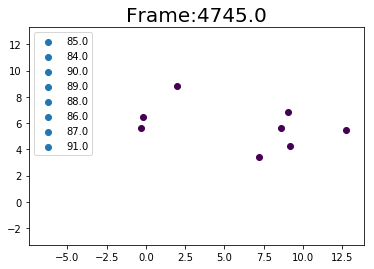

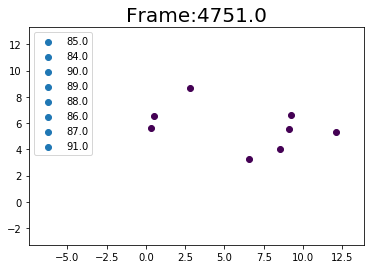

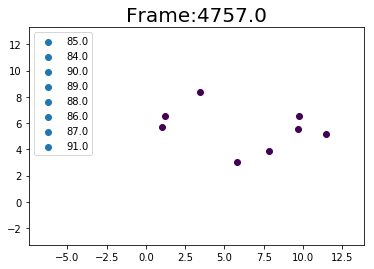

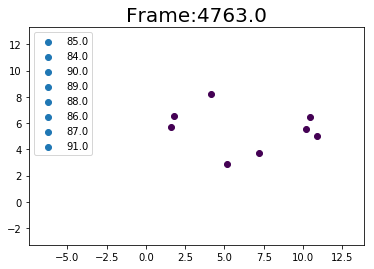

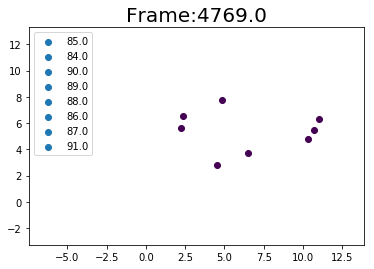

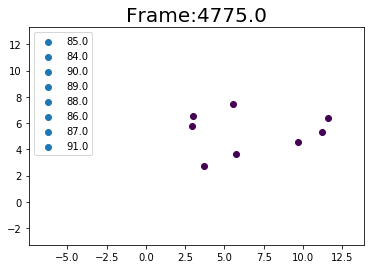

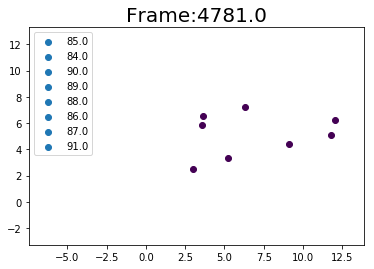

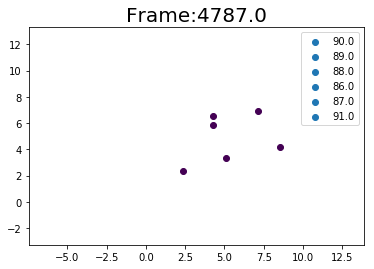

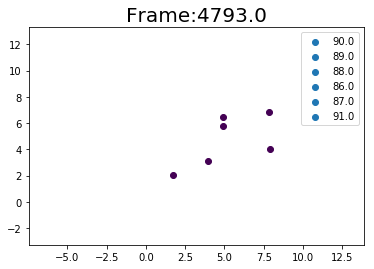

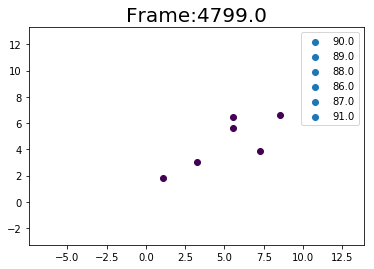

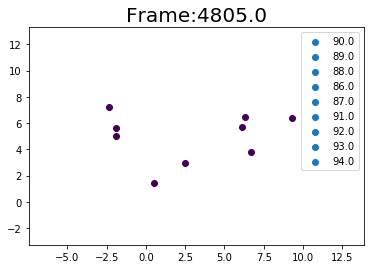

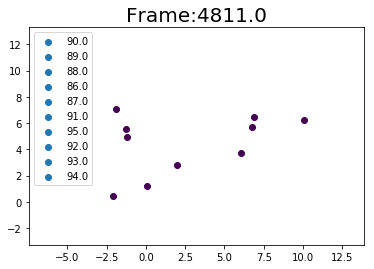

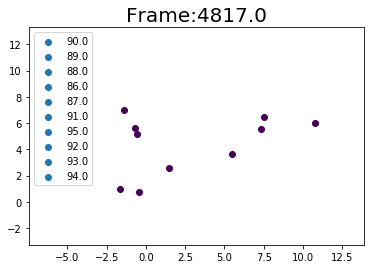

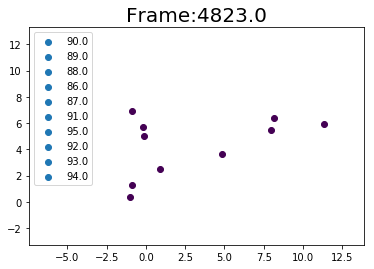

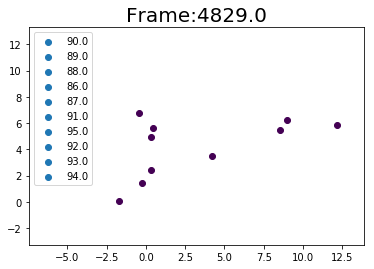

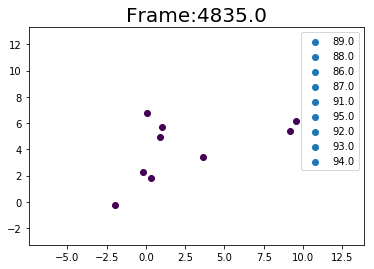

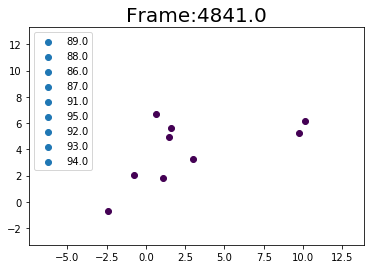

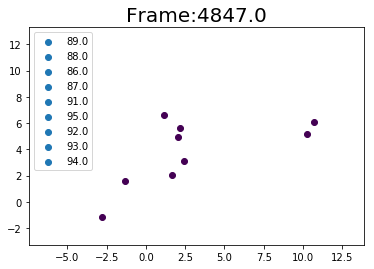

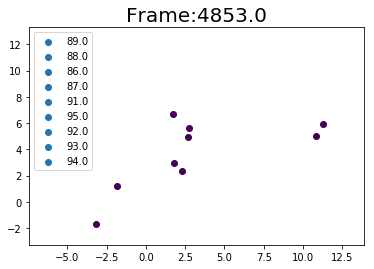

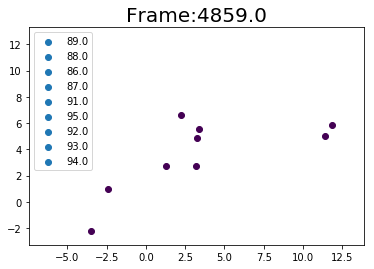

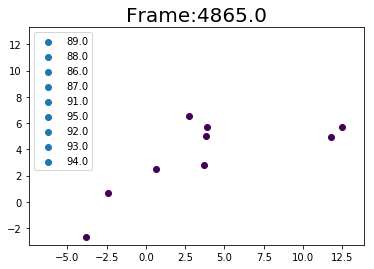

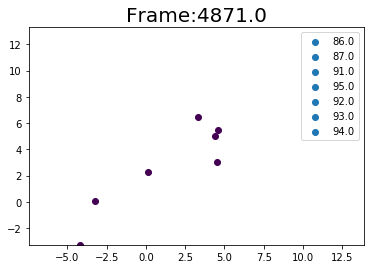

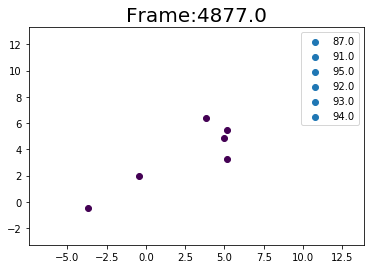

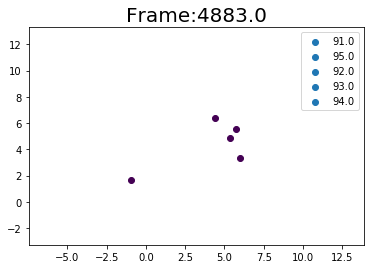

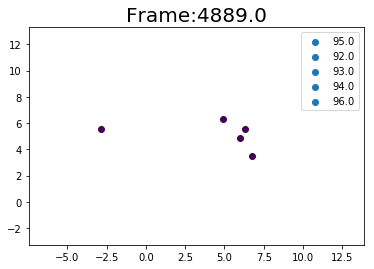

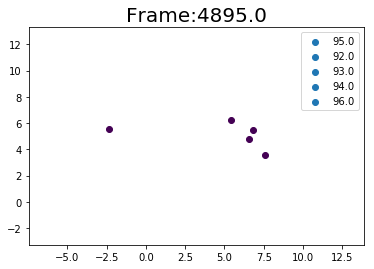

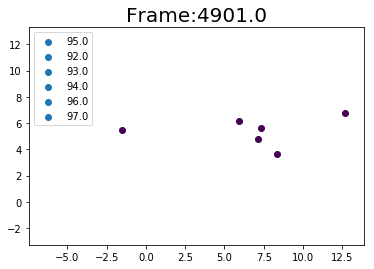

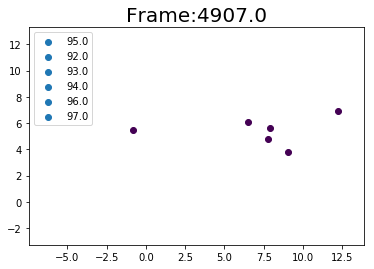

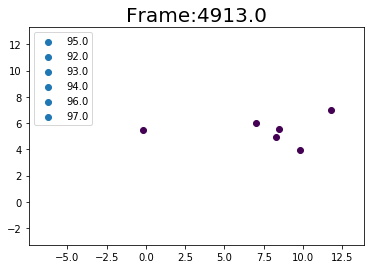

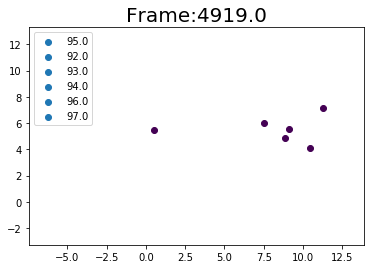

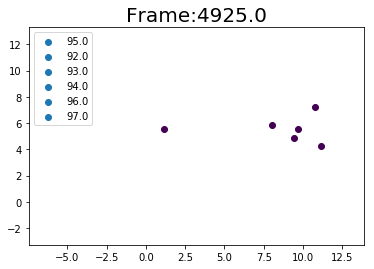

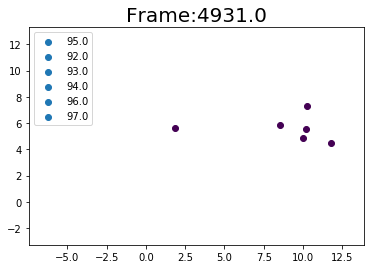

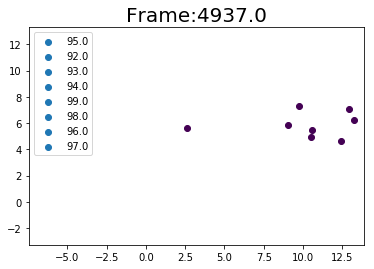

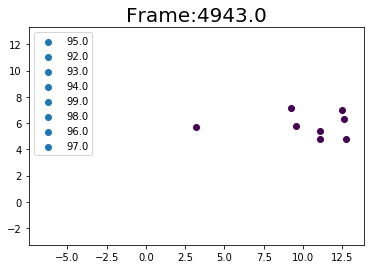

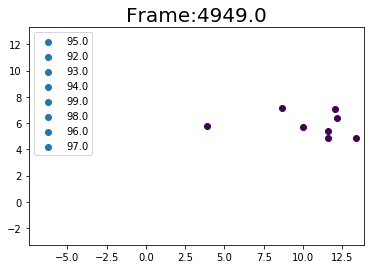

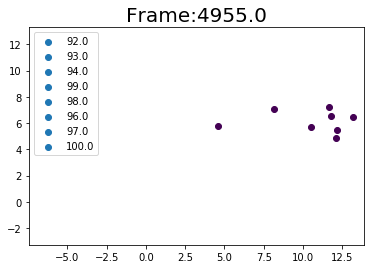

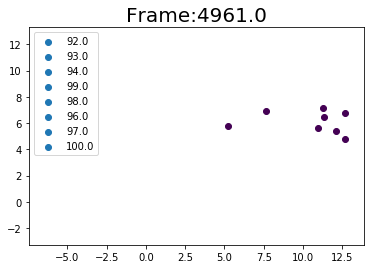

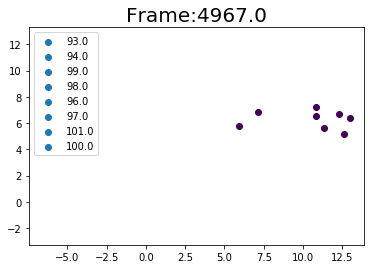

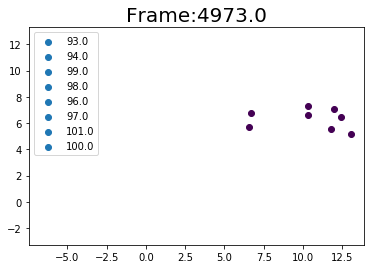

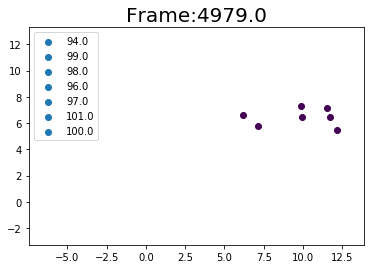

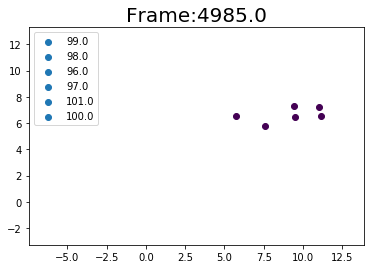

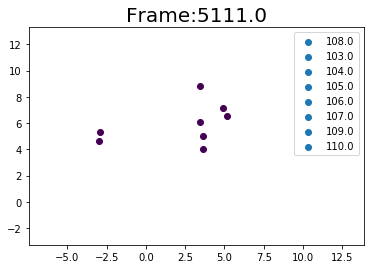

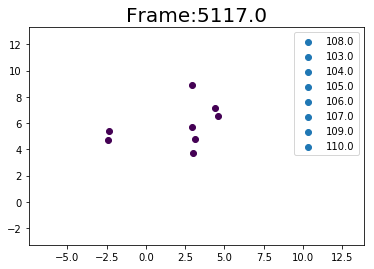

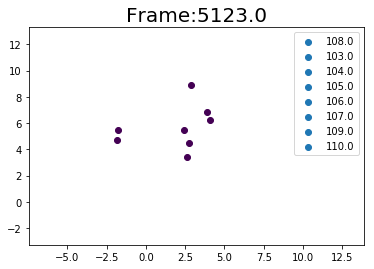

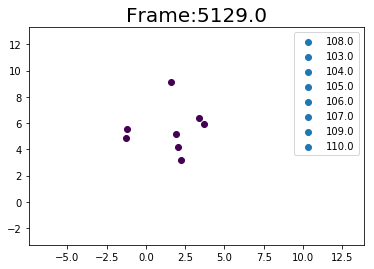

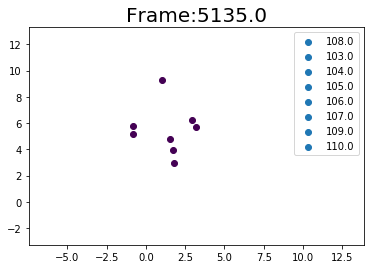

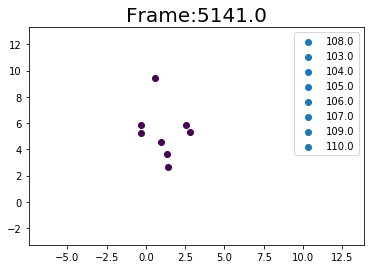

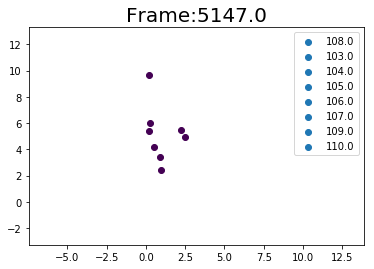

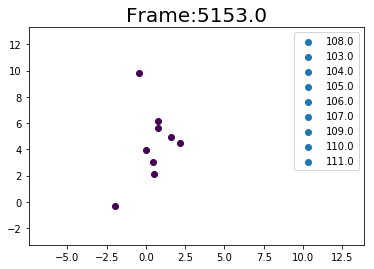

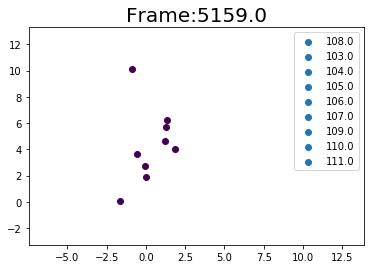

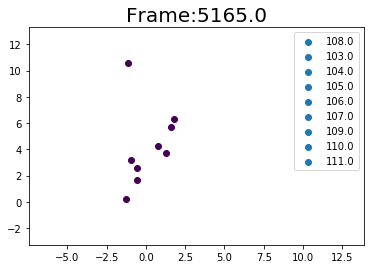

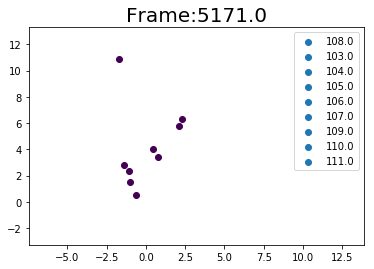

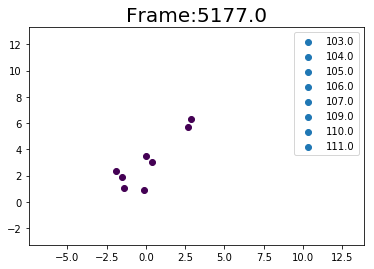

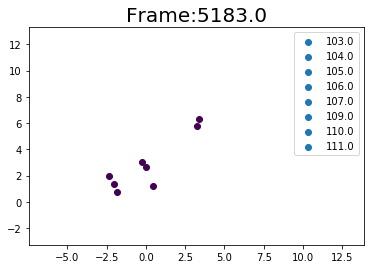

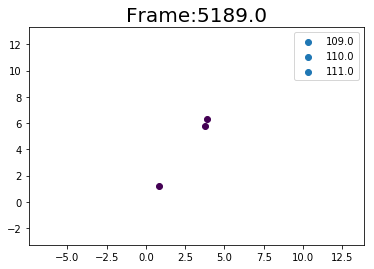

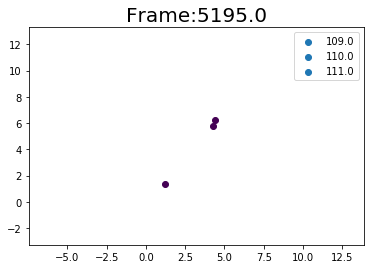

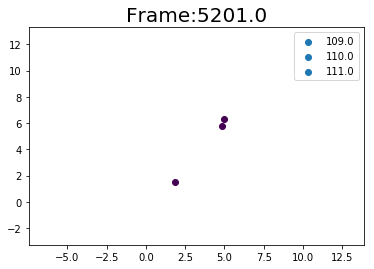

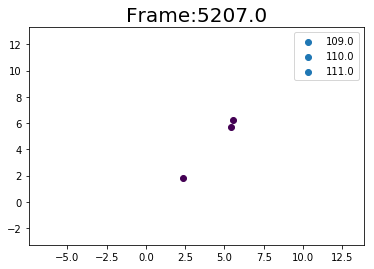

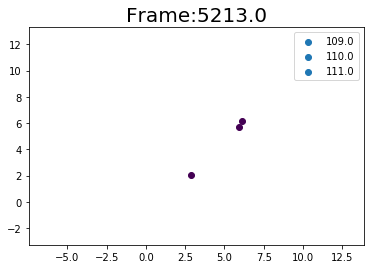

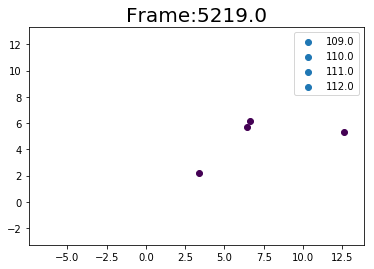

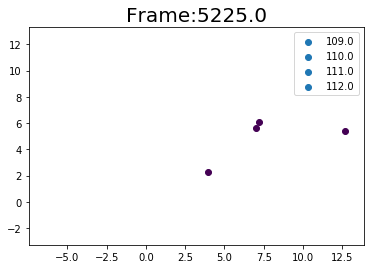

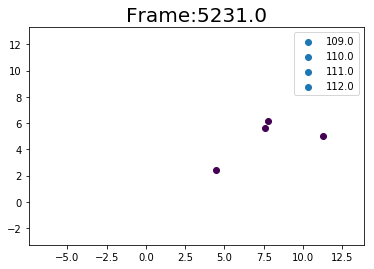

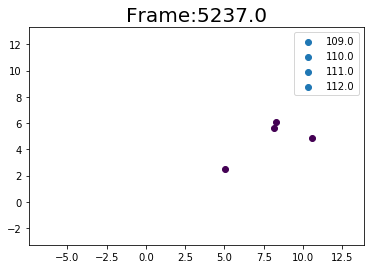

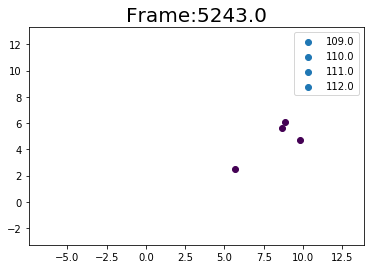

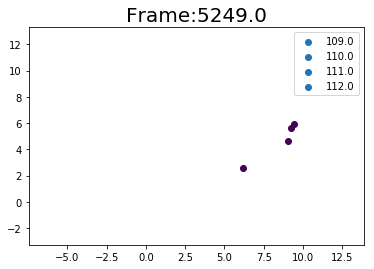

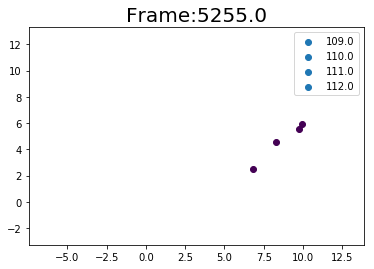

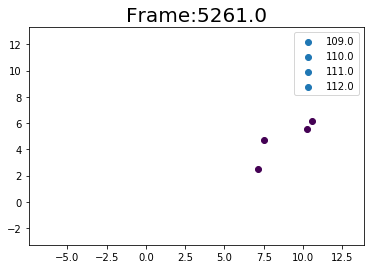

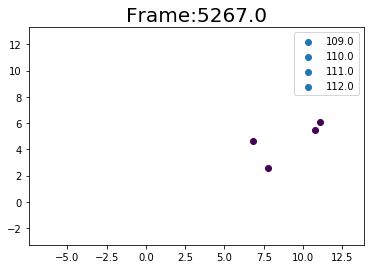

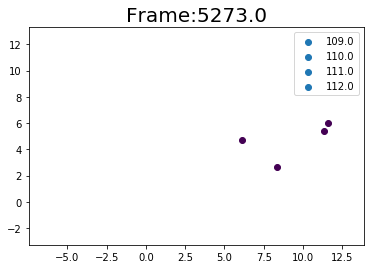

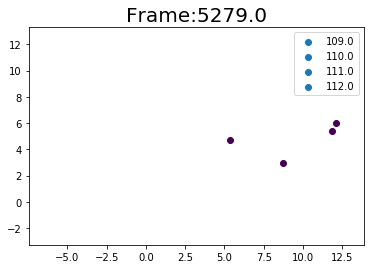

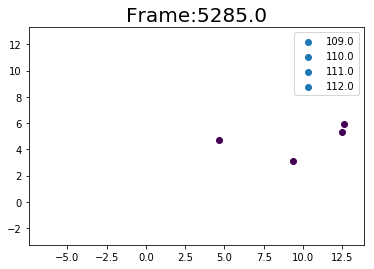

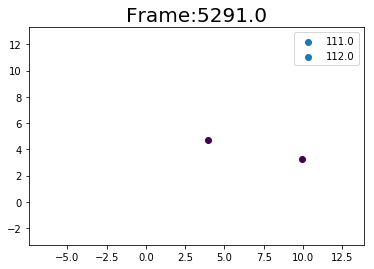

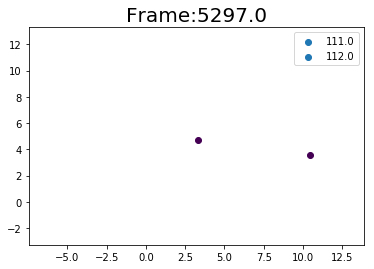

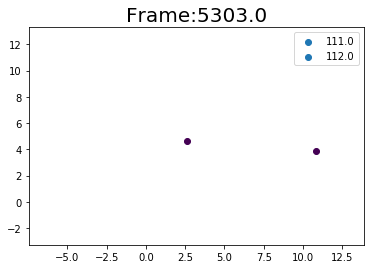

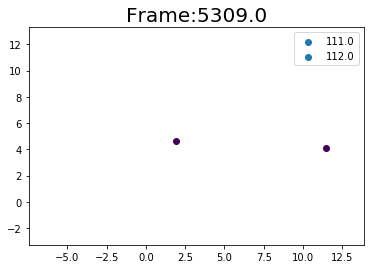

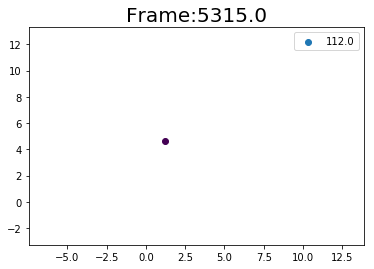

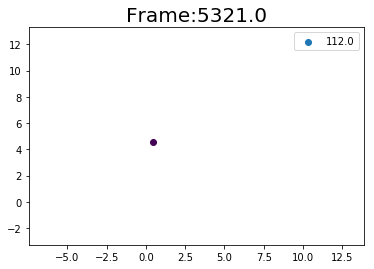

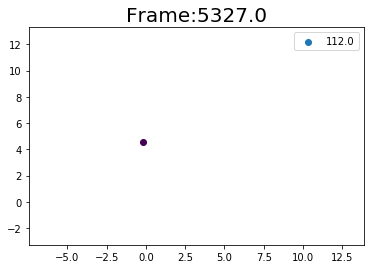

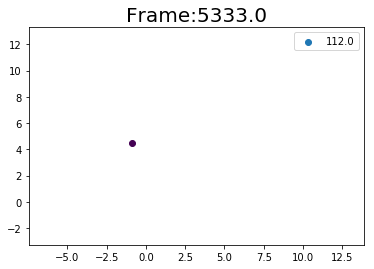

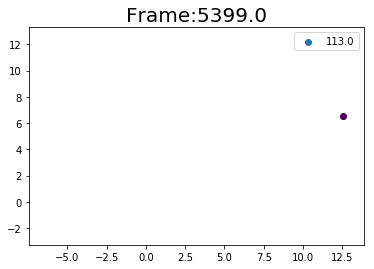

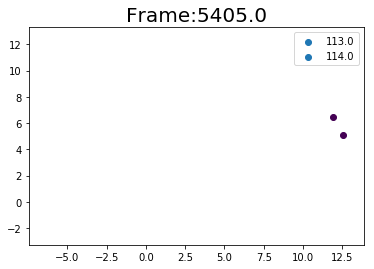

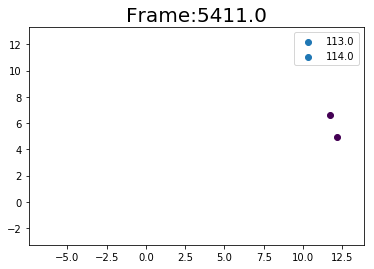

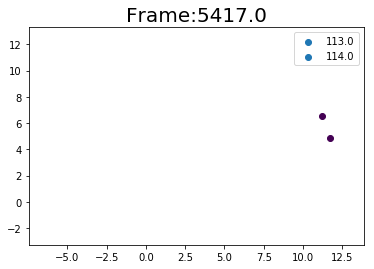

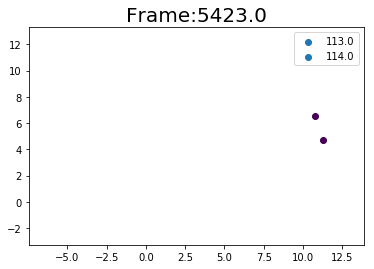

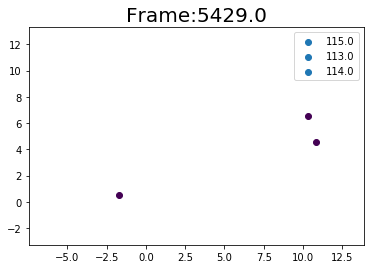

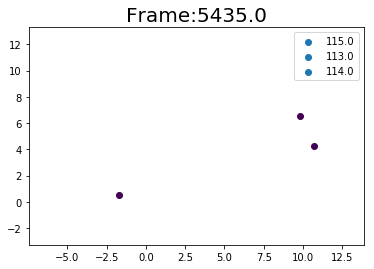

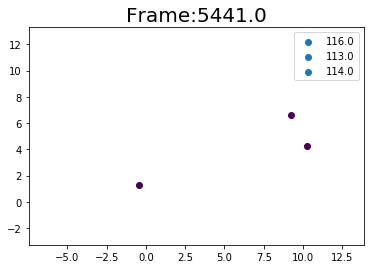

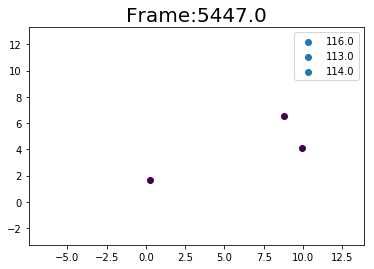

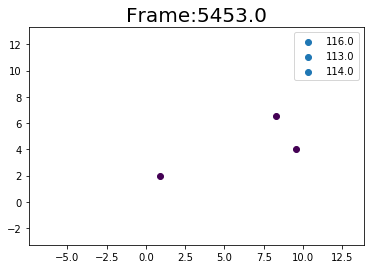

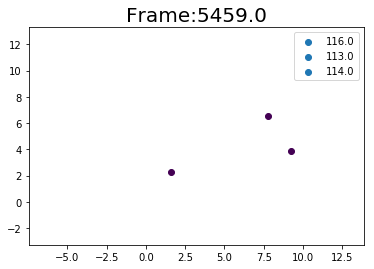

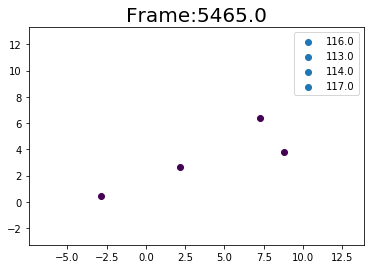

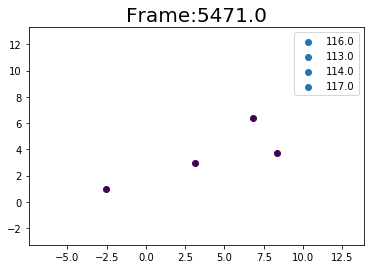

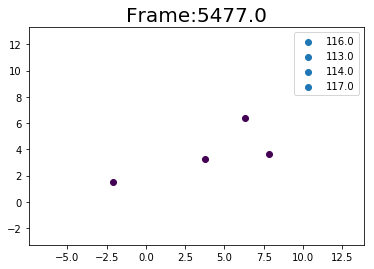

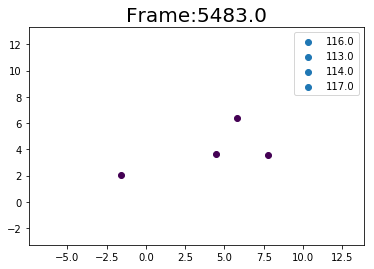

KeyboardInterrupt: 

In [100]:
# Visualization of pedestrian trajectories
for frame in frames_id.keys():
    plt.figure(1)
    plt.title("Frame:{}".format(frame),fontsize=20)
    plt.xlim((min_pedX,max_pedX))
    plt.ylim((min_pedY,max_pedY))
    for ids in range(len(frames_id[frame])):
        plt.scatter(frames_pedX[frame][ids],frames_pedY[frame][ids],marker='o',c=ids+1)
#         print(int(frames_id[frame][ids]))
    plt.legend(frames_id[frame])
    plt.show()
#     plt.pause(0.1)